In [4]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.api import het_goldfeldquandt
from scipy.stats import shapiro

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Anlaysis

In [5]:

car_df = pd.read_csv('/content/drive/My Drive/CarPrice_Assignment.csv')
car_df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
137,138,2,saab 99e,gas,turbo,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.00,160,5500,19,26,18620.0
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.00,85,5250,27,34,8195.0
103,104,0,nissan otti,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.00,152,5200,19,25,13499.0
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.50,123,4350,22,25,28176.0


In [5]:
#Determining the size of dataset
car_df.shape

(205, 26)

There are 205 rows and 26 columns in the dataset

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 27 columns in the dataset.

There are 3 object variables like car name, car body type , fuel system.

There are 8 variables namely wheelbase,carlength,carwidth,carheight,
boreratio,compressionratio,storke,price in Float datatypes.
There are 16 varaiables in Int datatype namely
'car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'engine_type'

In [7]:
car_df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
#checking if there are  duoplicate values in the dataset

car_df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [ ]:
#Checking if there are null values in the datset

car_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


There are no null values in the dataset.

# Exploratory Data Analysis

In [11]:
#Histogram and BarPlot for Numerical data

def labelled_baplot(data,feature,kde=False,bins=50):

  f,(ax1,ax2) = plt.subplots(
      nrows=2,
      ncols=1,
      figsize=(15,10),
      sharex=True,
      gridspec_kw={"height_ratios":(0.25,0.75)}
  )

  sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      bins=bins,
      ax=ax2
  ) if (bins) else sns.histplot(
      data=data,
      x=feature,
      kde=kde,
      ax=ax2
  )

  ax2.axvline(data[feature].mean(),color='green',linestyle='-')
  ax2.axvline(data[feature].median(),color='black',linestyle='--')

  sns.boxplot(
      data=data,
      x=feature,
      showmeans=True,
      ax=ax1
  )

  plt.show()


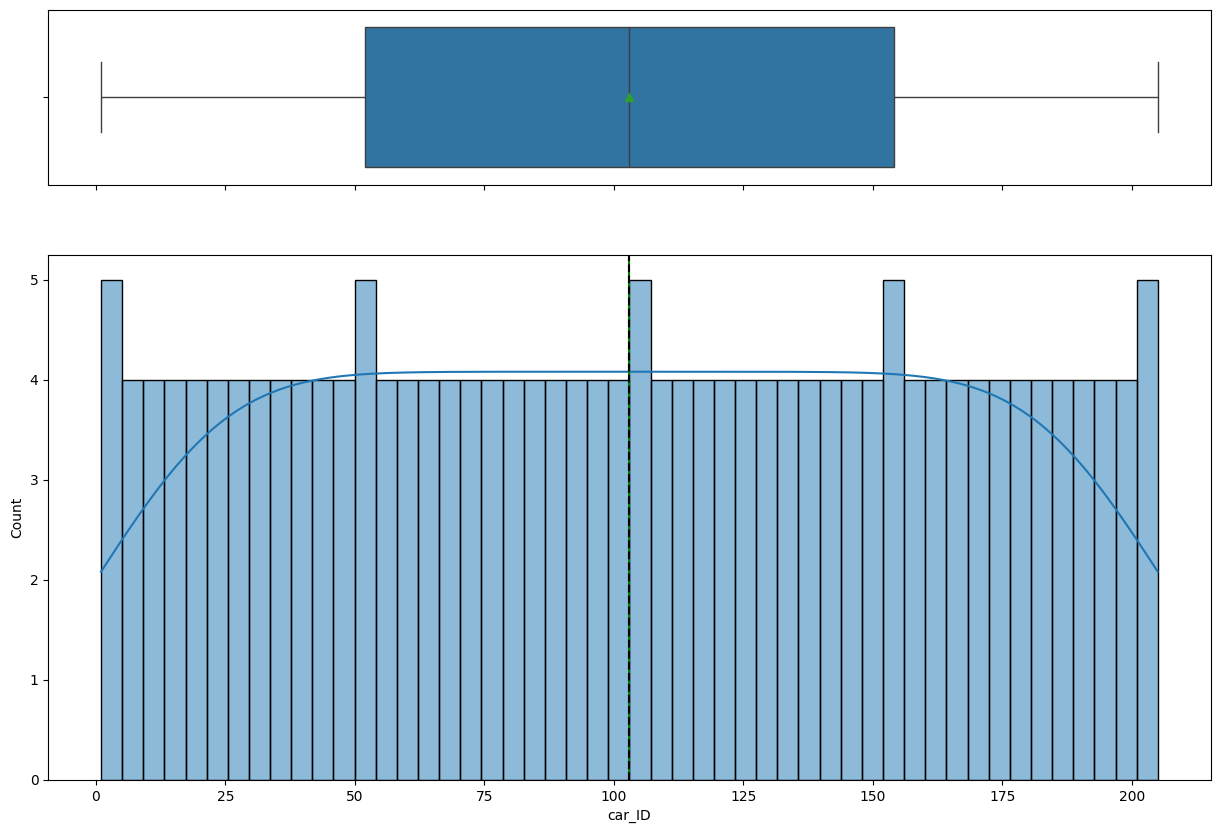

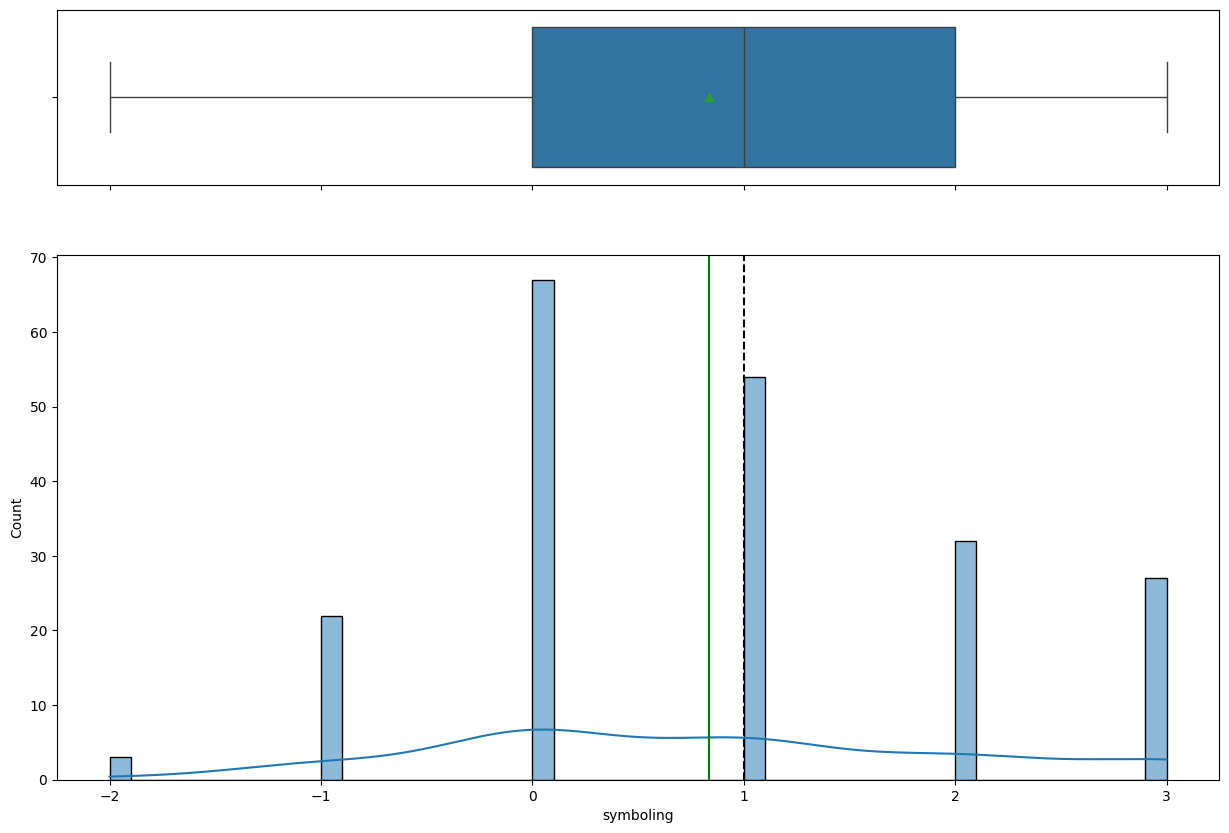

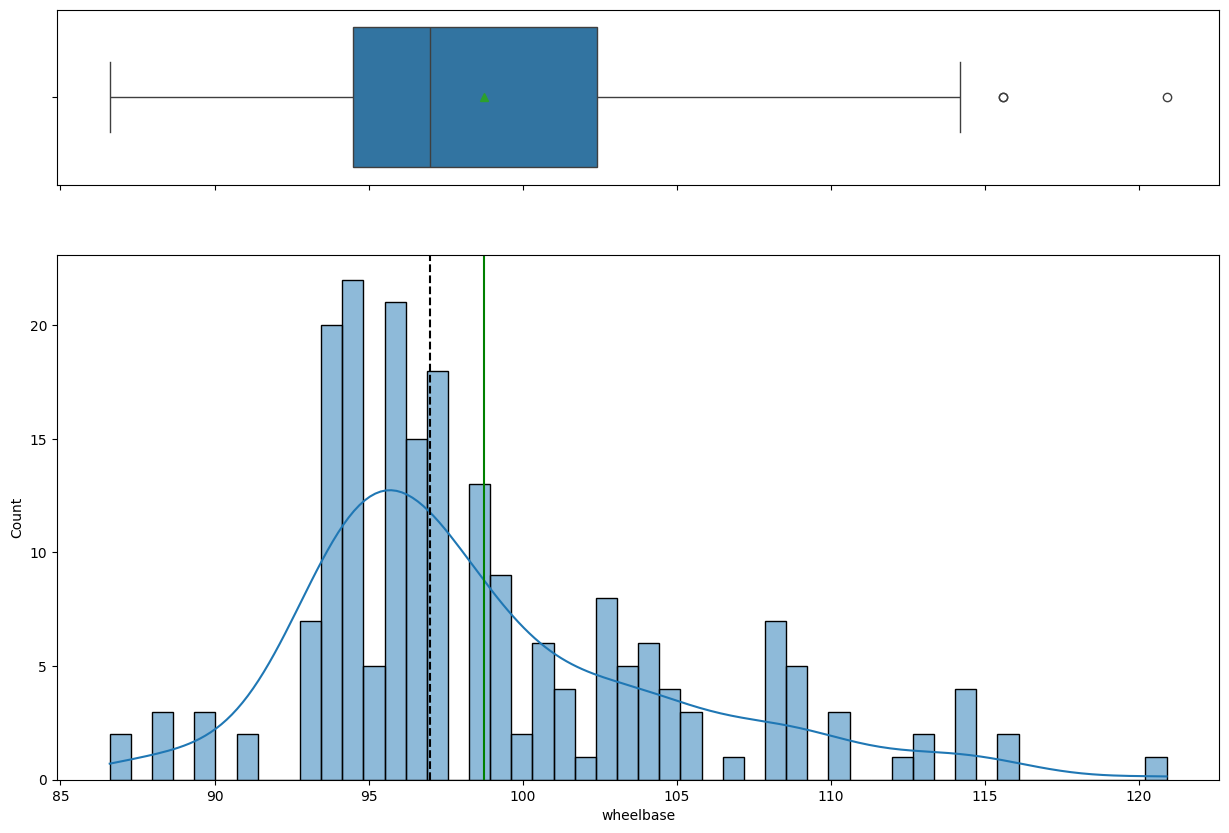

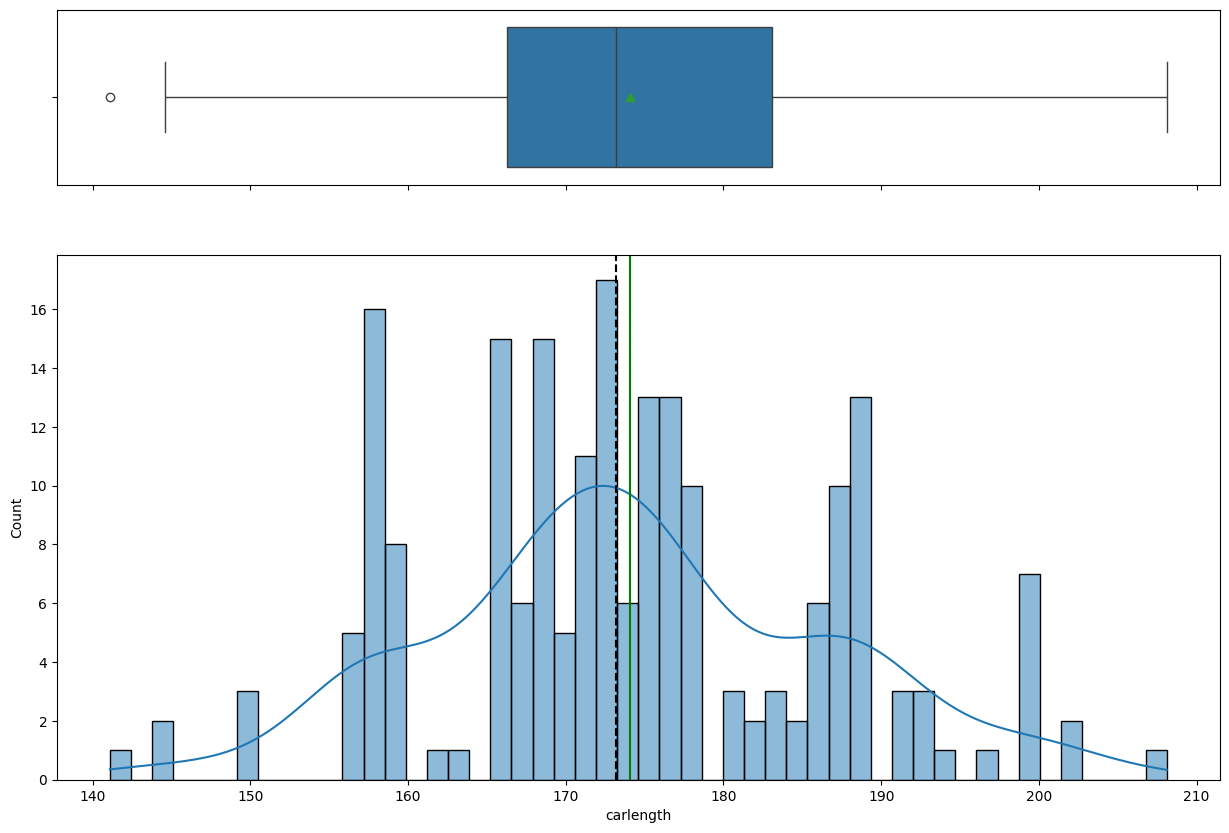

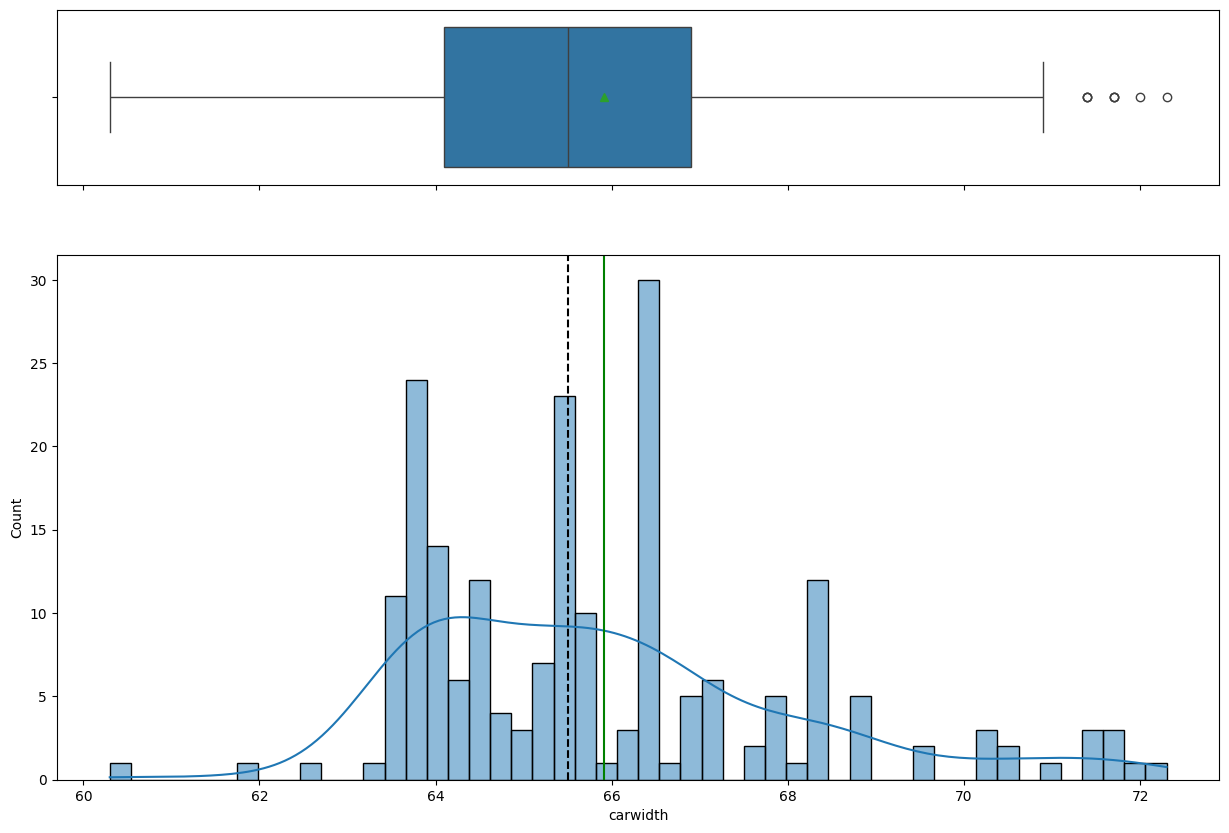

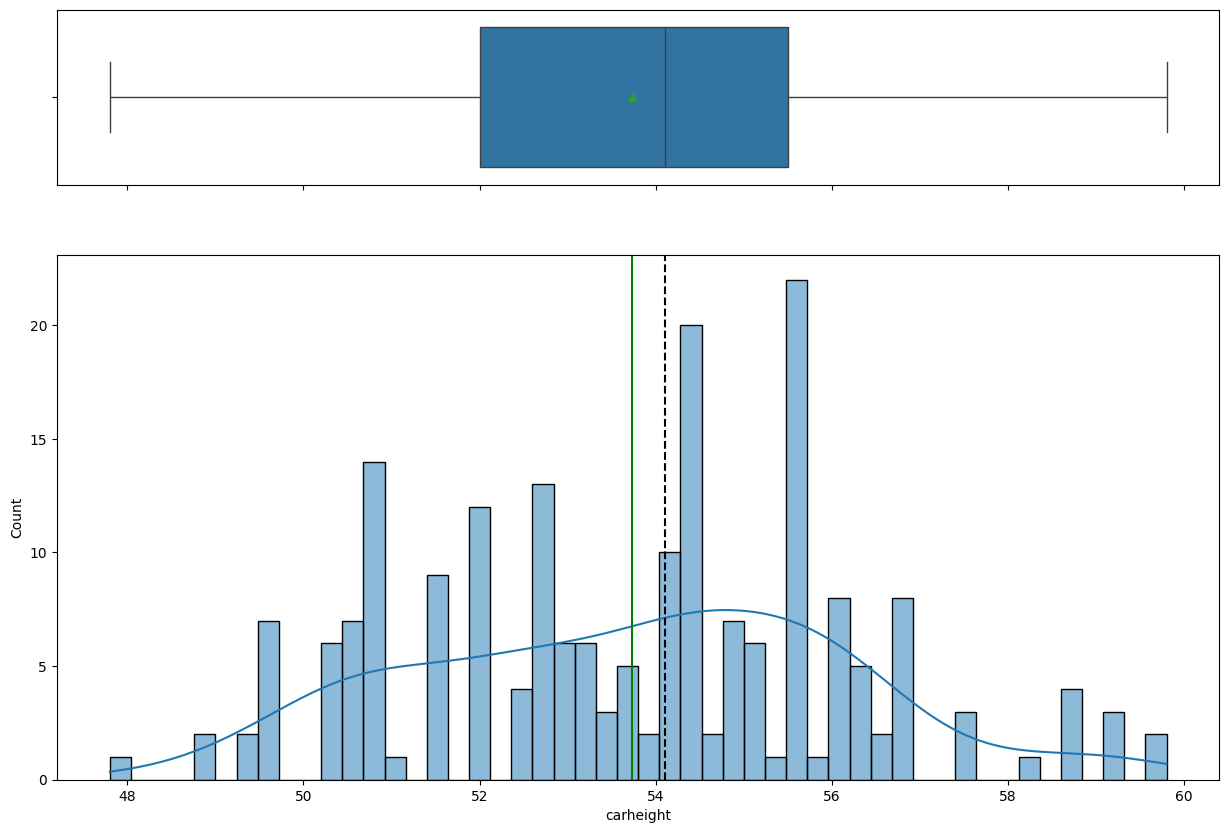

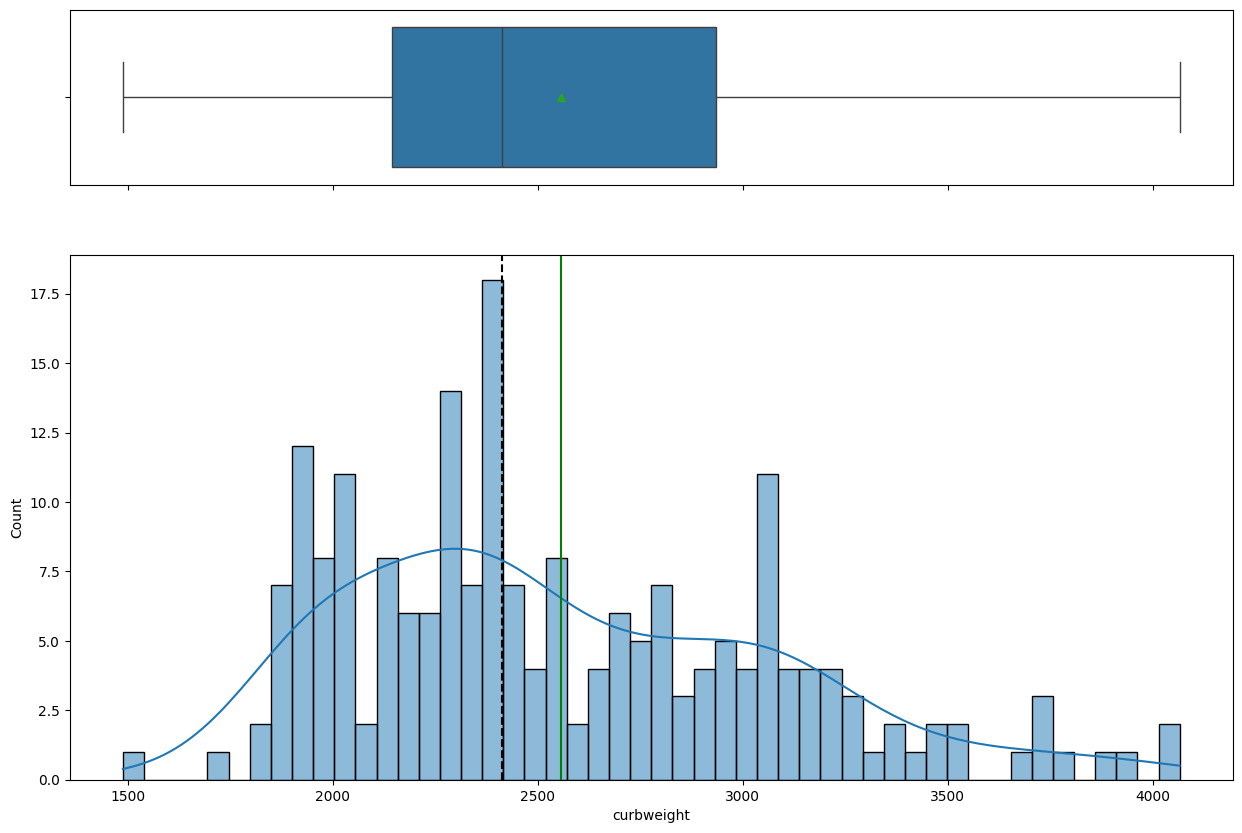

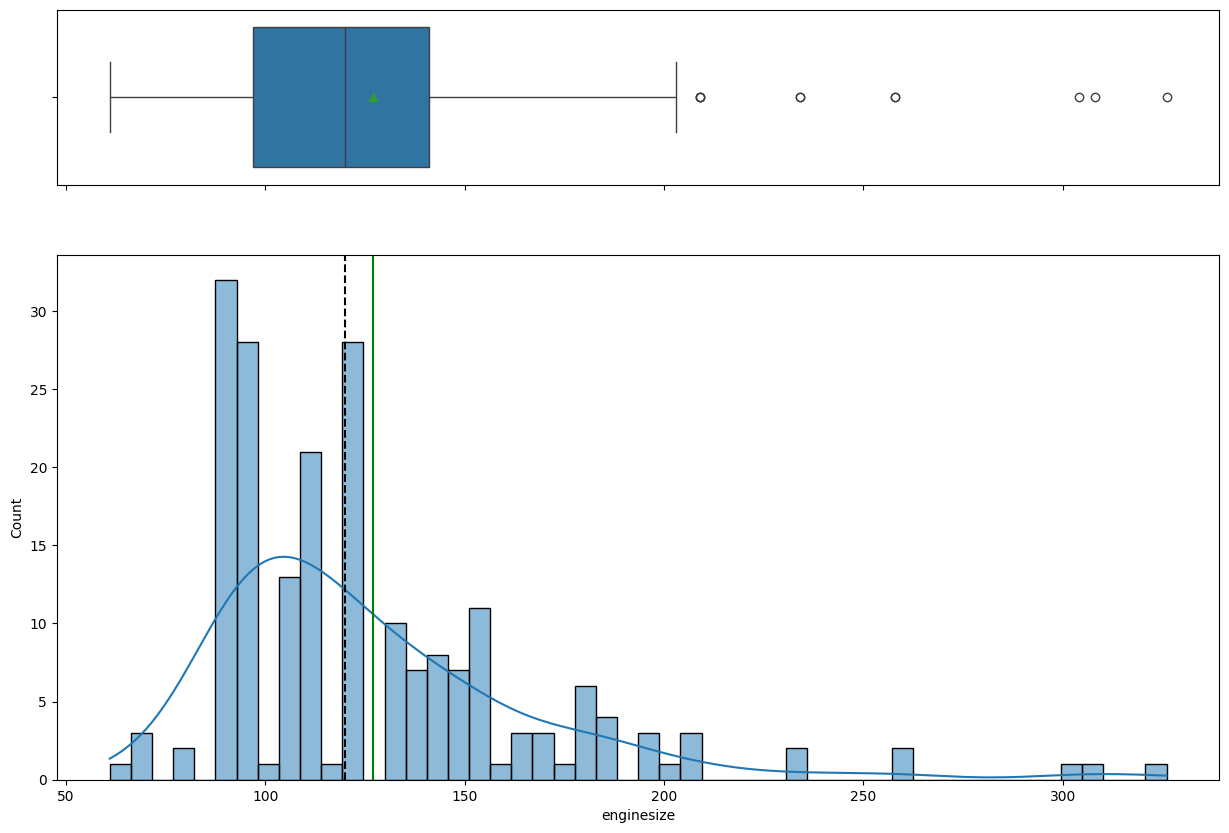

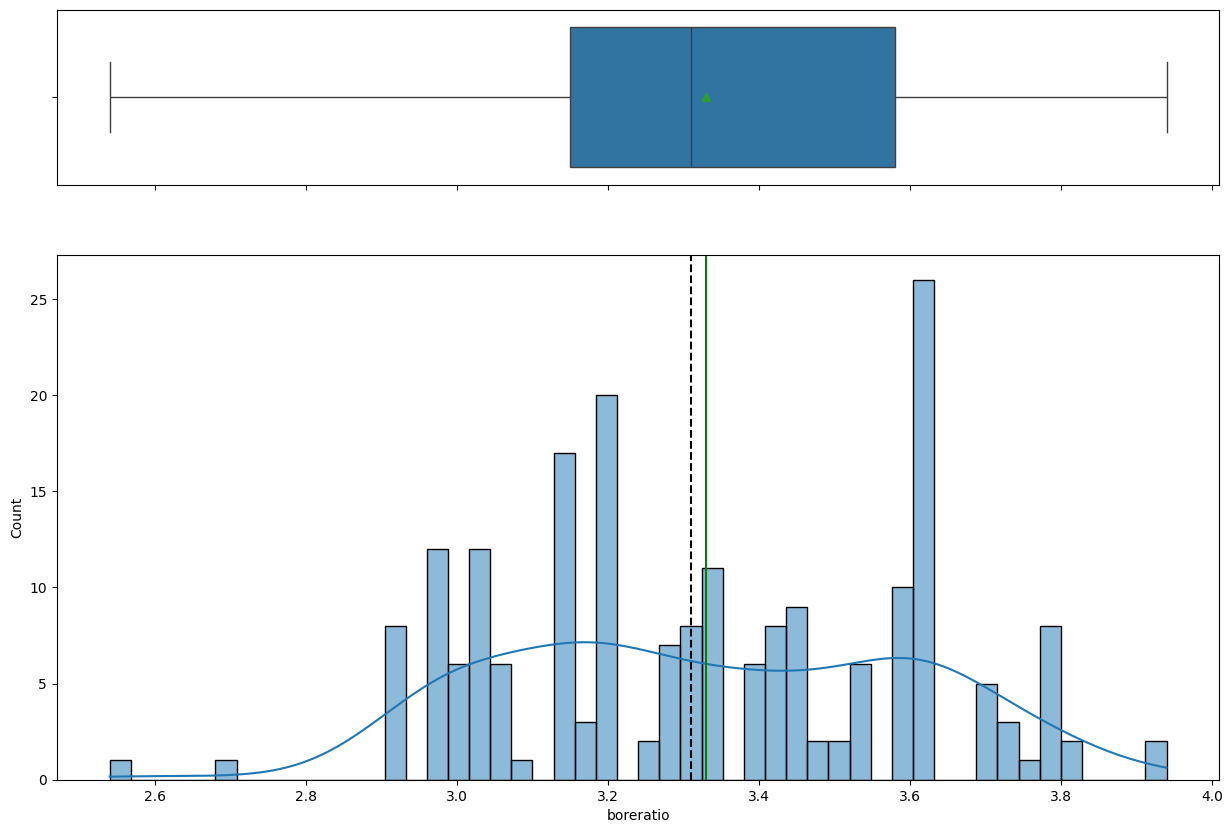

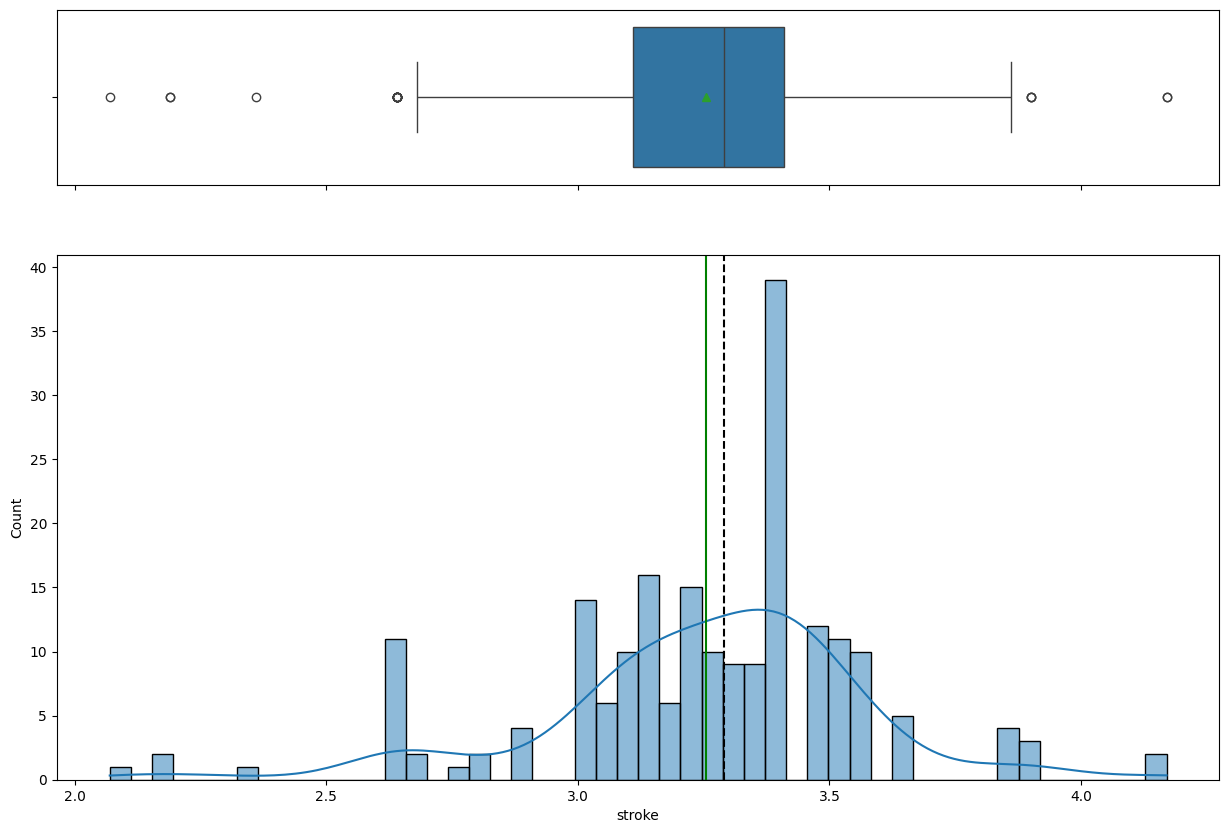

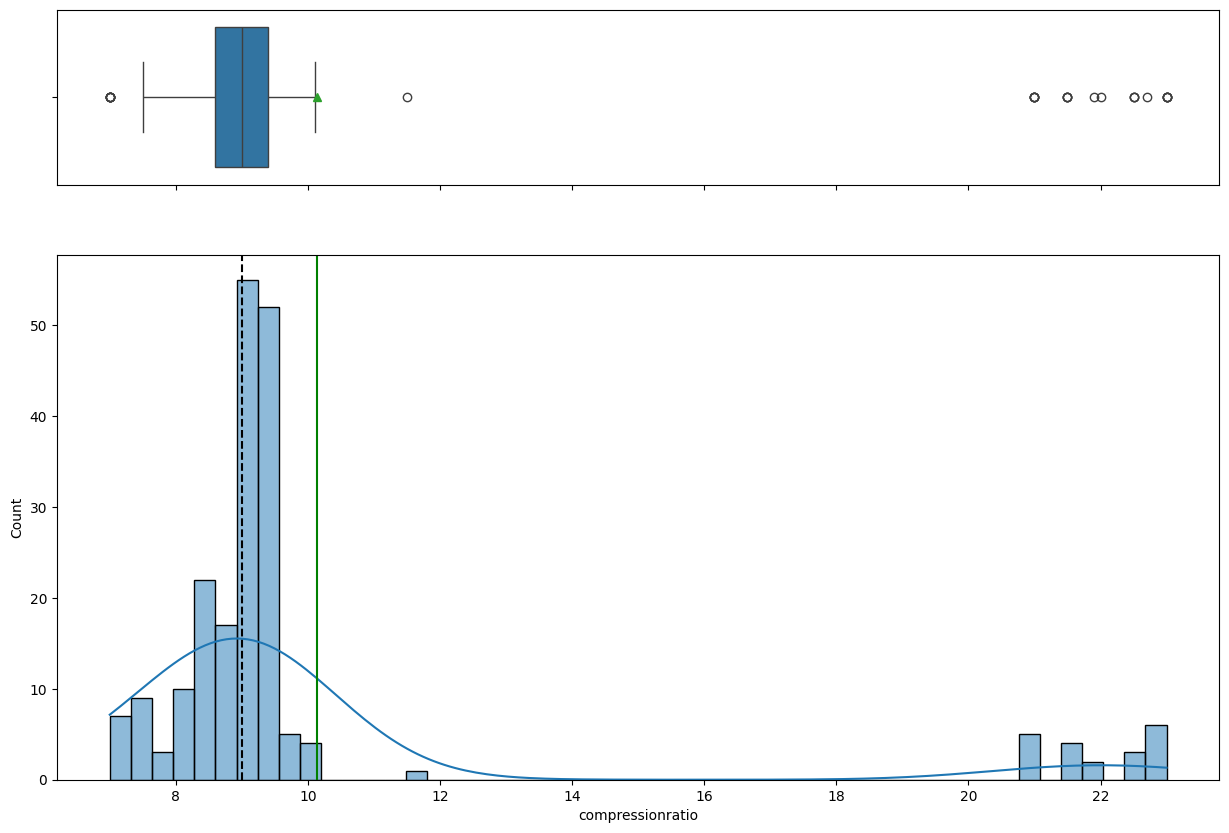

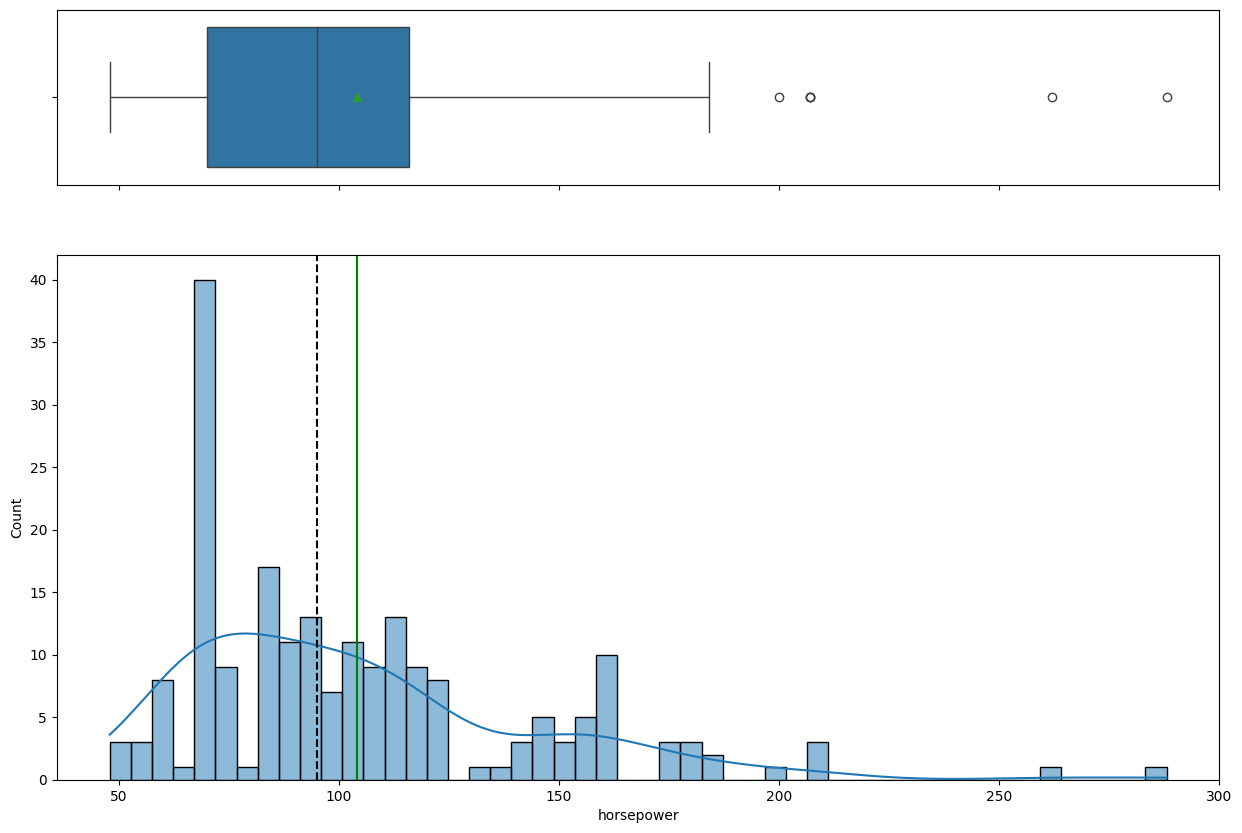

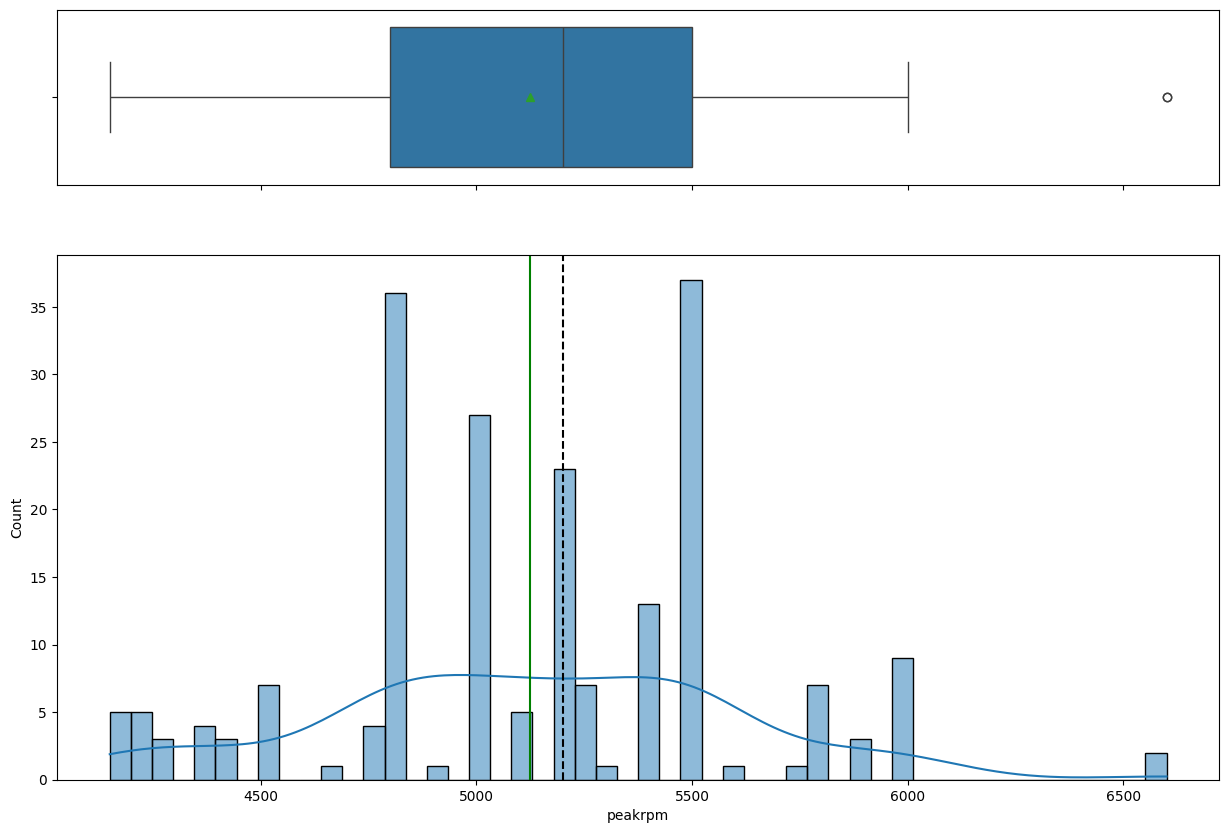

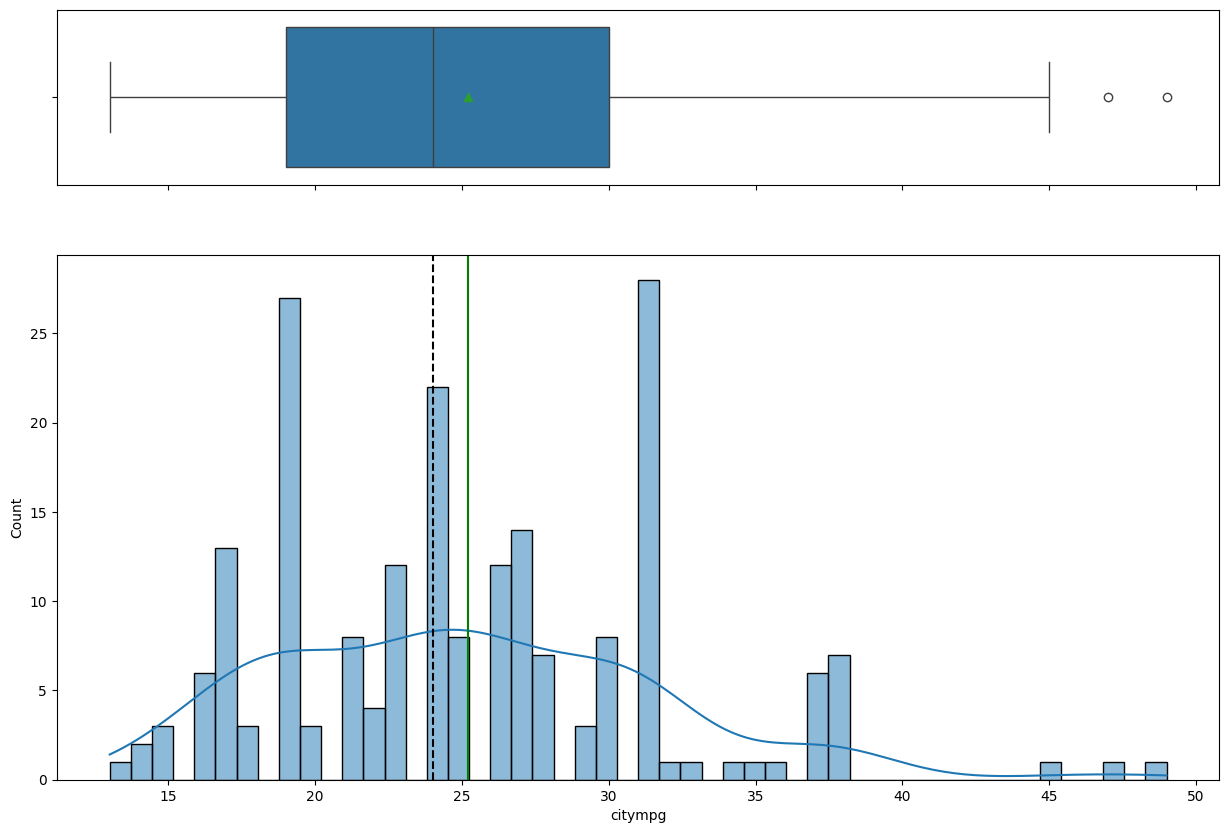

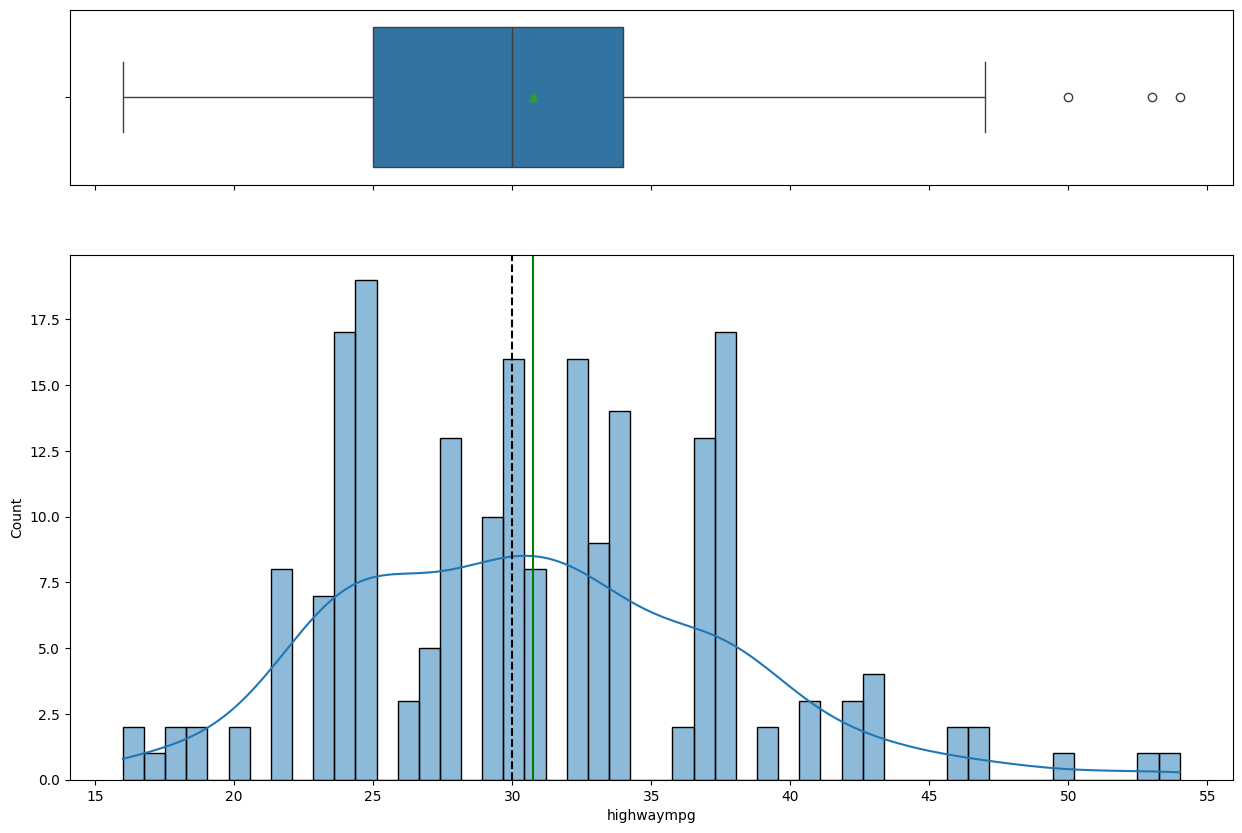

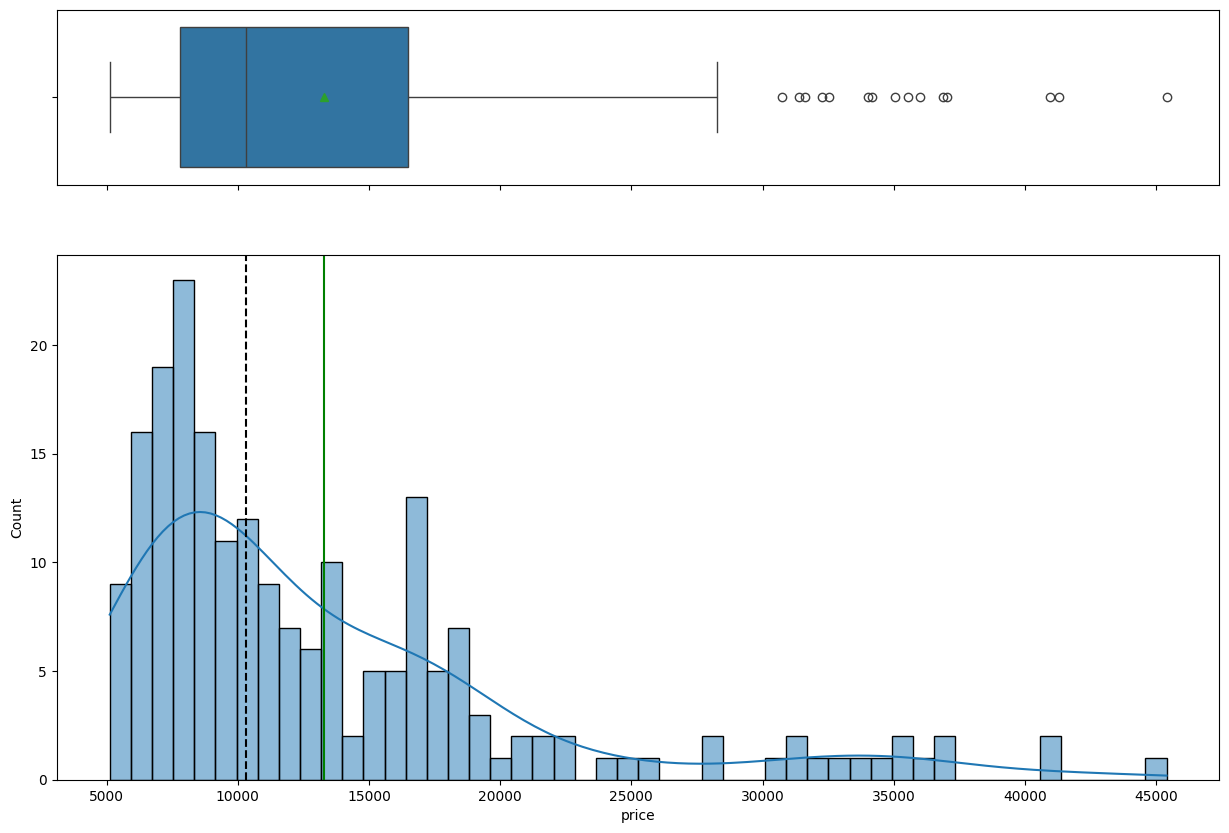

In [12]:
#Plotting histogram and boxplot for ALL numerical values

for i in car_df.select_dtypes(include='number').columns.to_list():
  labelled_baplot(car_df,i,kde=True)

Numerical Data Inference

1. **Carwidth**
   The average width of car is 66 inches and the data is slightly skewed to right with maximum  upto 72 inches.
2. **Wheel  Bas**e
   95-115 inches 25-75 th percentile of car wheel base with
   average being at 99 inches
3.**CarLength**
  The average car length is 175 cm with 25th-75th percentile being
  165-180 cm.
4. **Car Height**
   Car height ranges from 48 inches to 60 inches with average being
   54 inches.
5. **Curbweight**
   Weight lies between 1500 to 4000 pounds and the average being 2500 pounds
6. **Engine size**
   Size lies between 50-300 with mean of 140.
7. **Bore Ratio **
   2.6-4 inches distrubtion of bore ratio with twin peaks at 3.2 and
   3.6 inches.
8. **Stroke** is 2 - 4 distribution with mean at 3.3 inches.
   The stroke ditribution is pretty normal with outliers at both ends.
9. **Compression ratio**
   25-75 th percentile of car compression ratio lies between 8-10
   with few outliers at 22.
10.**Horse Power**
   25-75 th percentile of horsepower lies between 50-150
   with few outliers at 250 and 300.
   The average horsepower is close to 100
   

In [5]:
#Countplot with percentage for Object Data

def countplot_with_percentage(data,feature,percentage=True,n=None):
  total = len(data[feature])
  count = data[feature].nunique()



  if n==None:
    plt.figure(figsize=(count+2,15))
    ax=sns.countplot(
               data =data,
               x=feature,
               order=data[feature].value_counts().index,
               palette='Paired'

  )
  else:
    if(n>count):
     n = count
    plt.figure(figsize=(n+2,15))
    ax=sns.countplot(
               data =data,
               x=feature,
               order=data[feature].value_counts().index[:n],
               palette='Paired'

  )

  plt.xticks(rotation=90)
  for p in ax.patches:
   height = p.get_height()

   if (percentage==True):
      label = "{:.2f}%".format(height/total*100)
   else:
      label = height

   x = p.get_x()+p.get_width()/2
   y = height

   ax.annotate(
        label,
        (x,y),
        ha='center',
        va='center',
        fontsize=12,
        xytext=(0,5),
        textcoords='offset points'
    )
  plt.show()


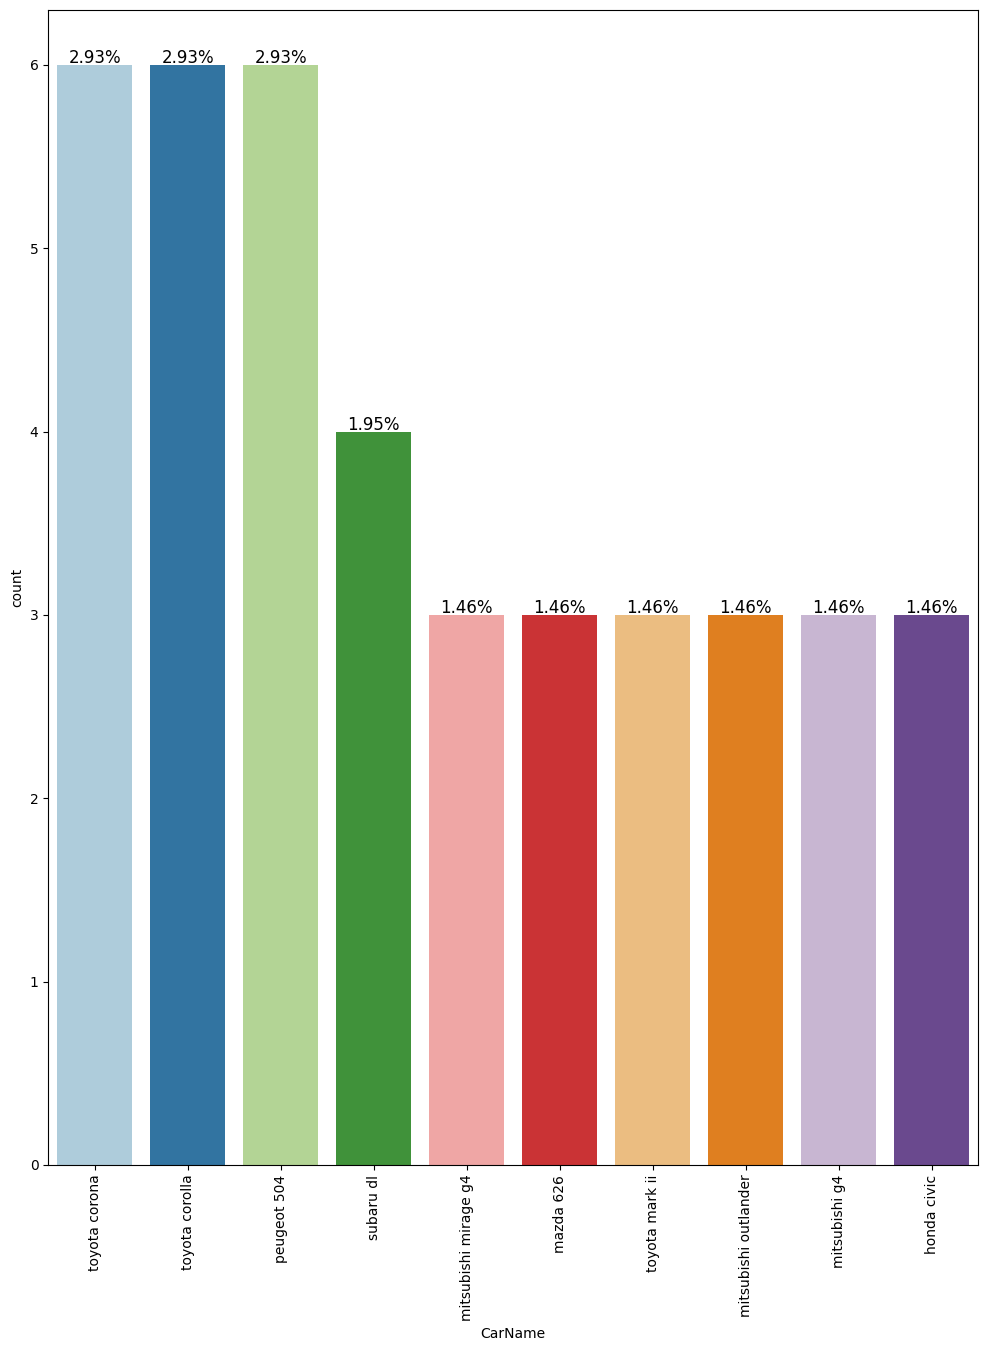

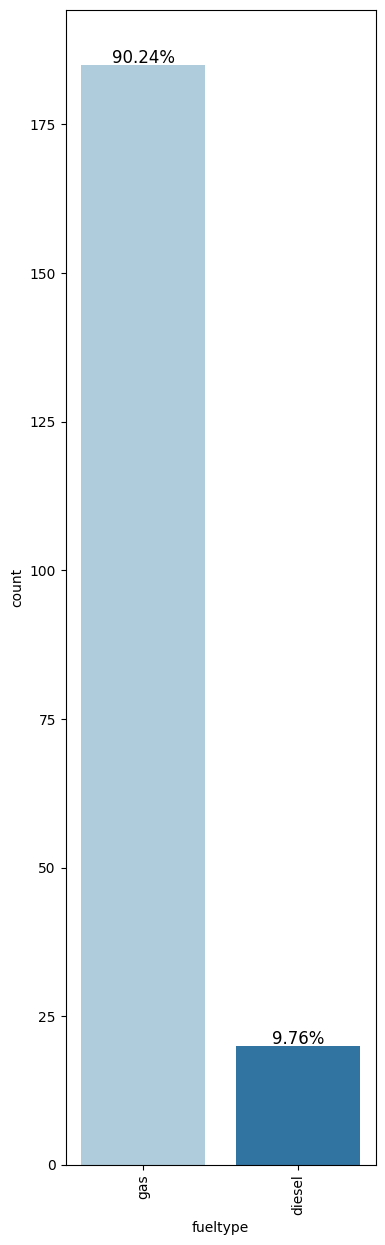

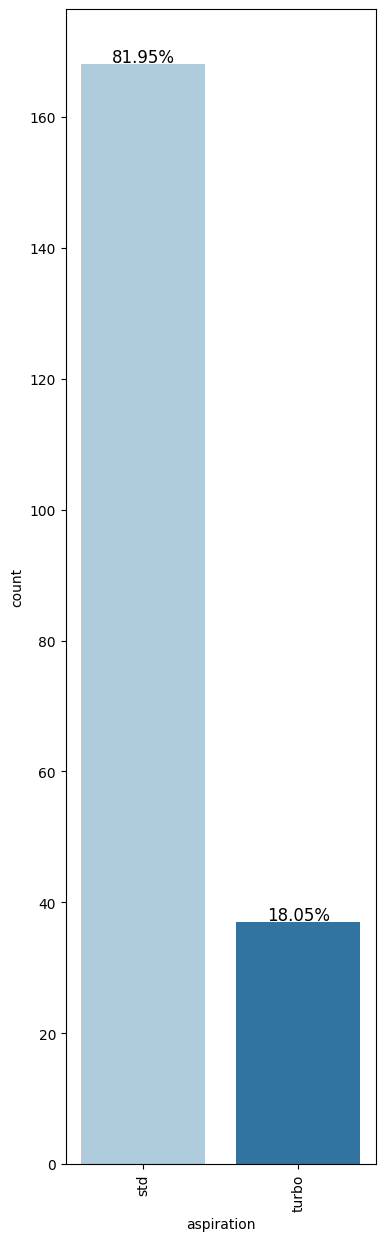

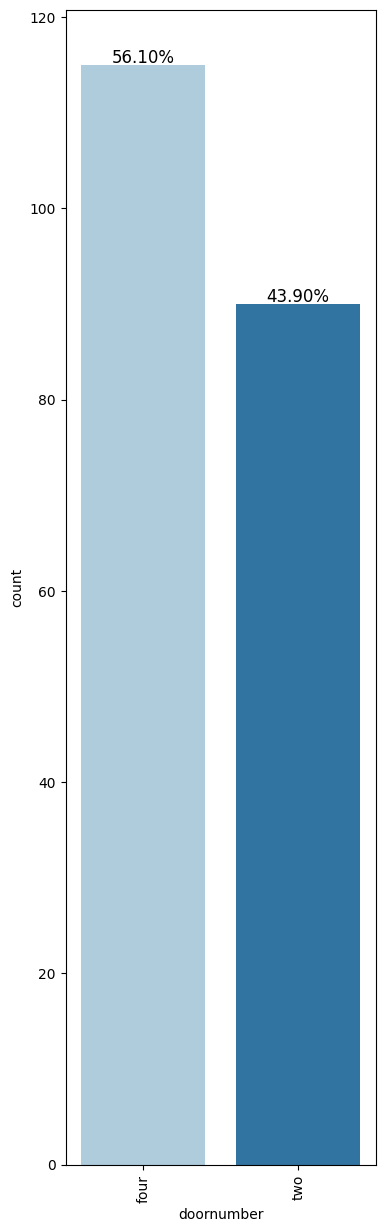

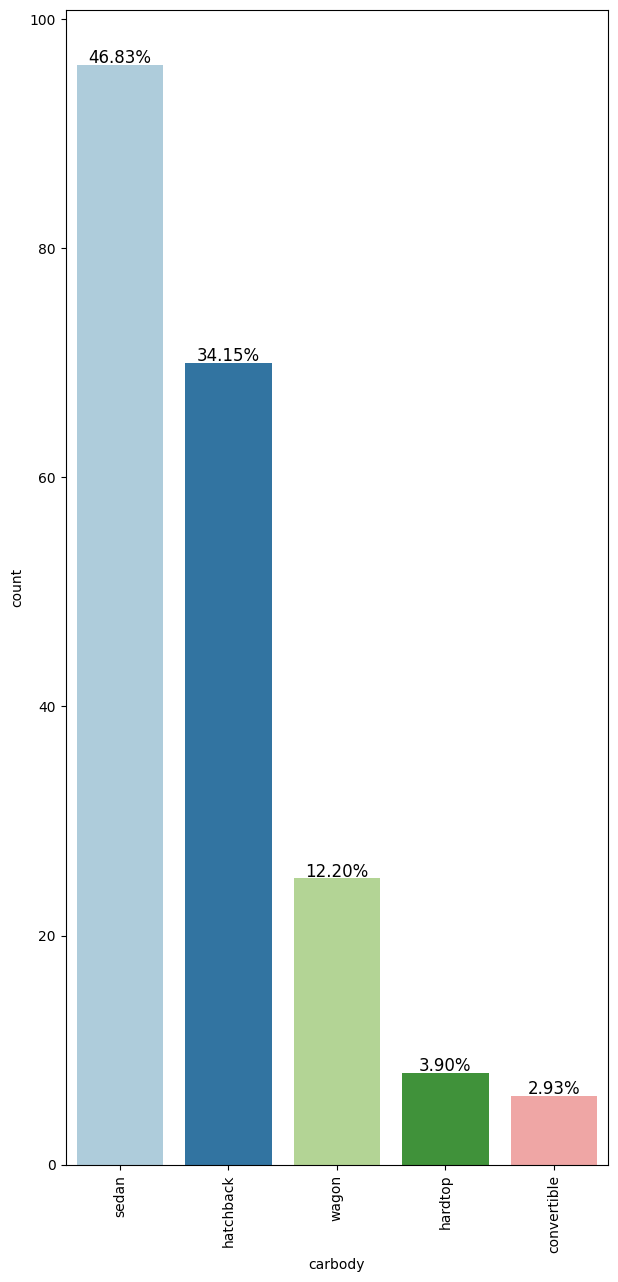

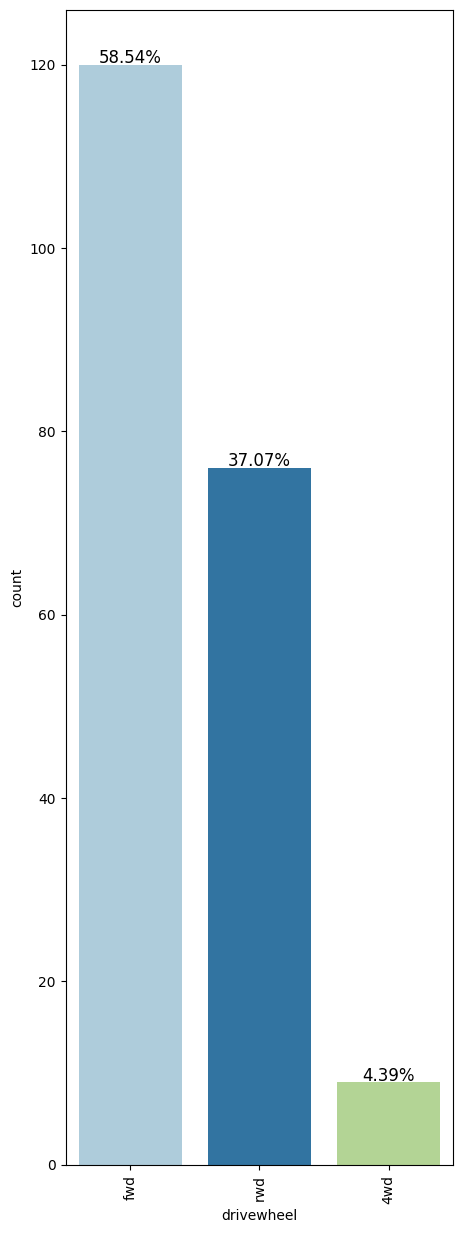

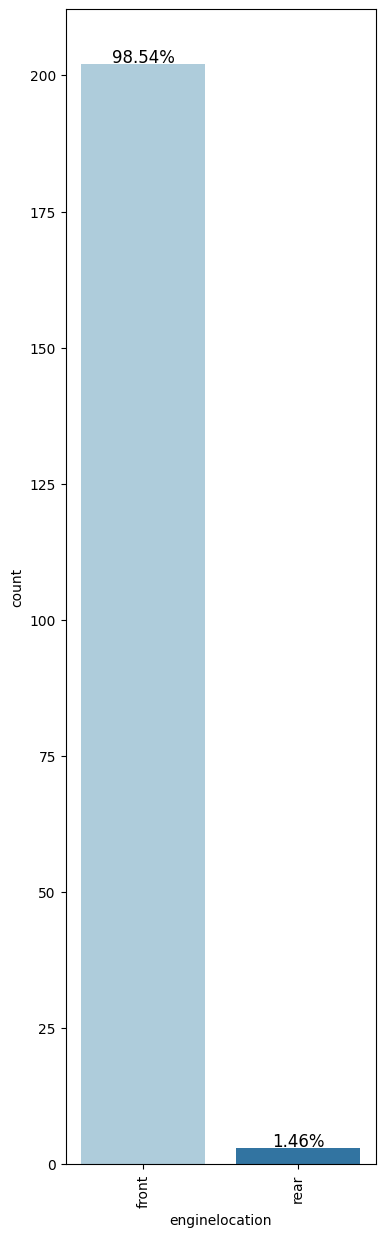

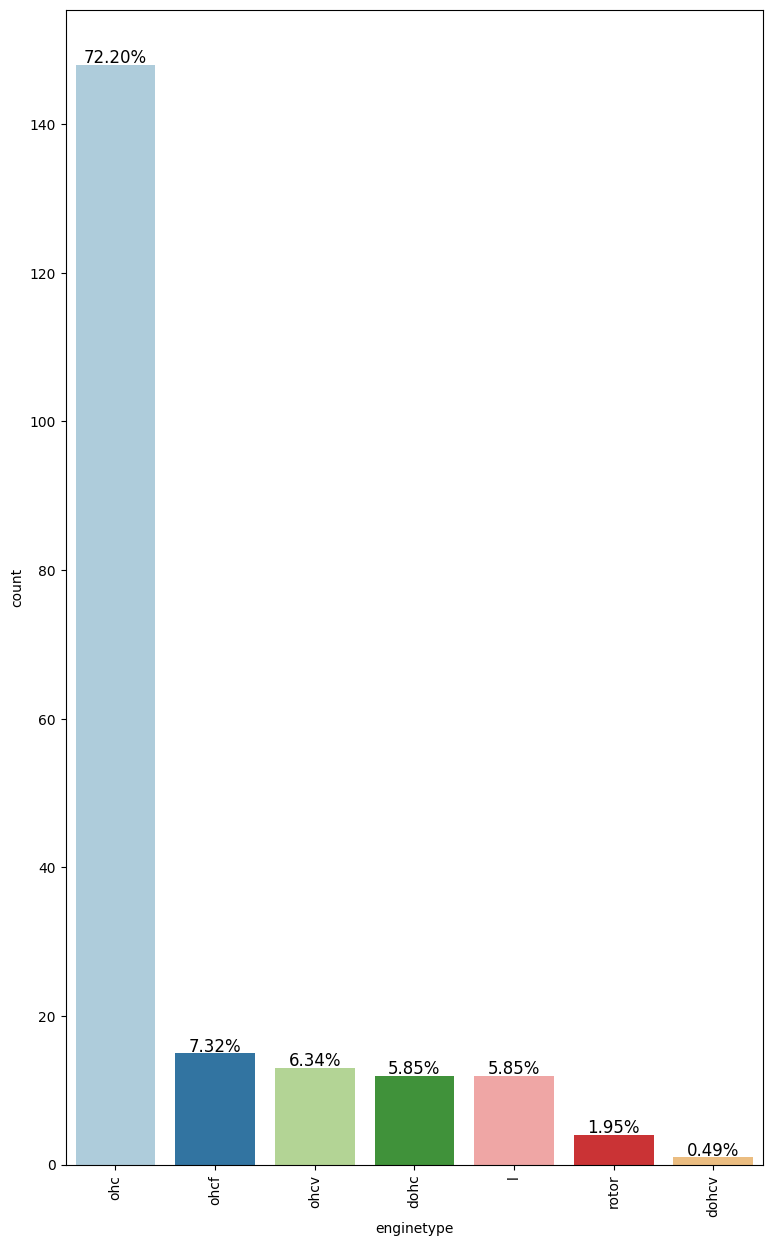

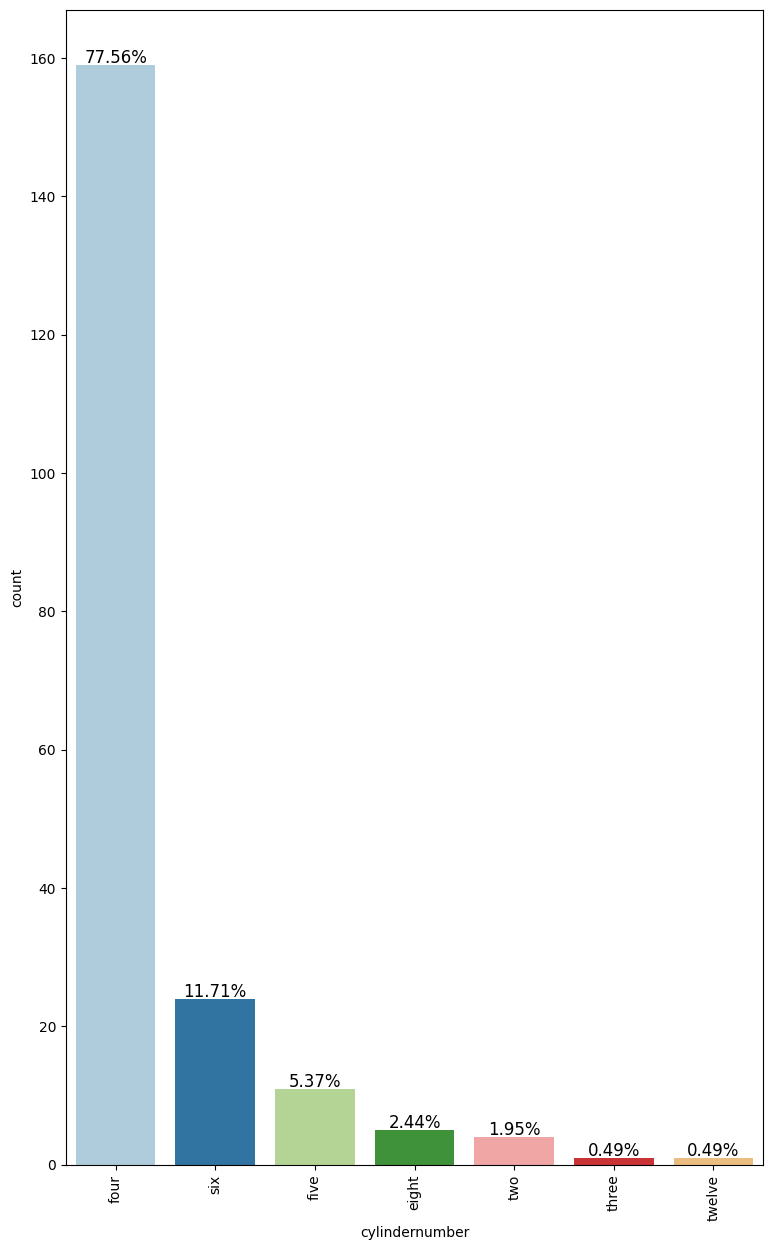

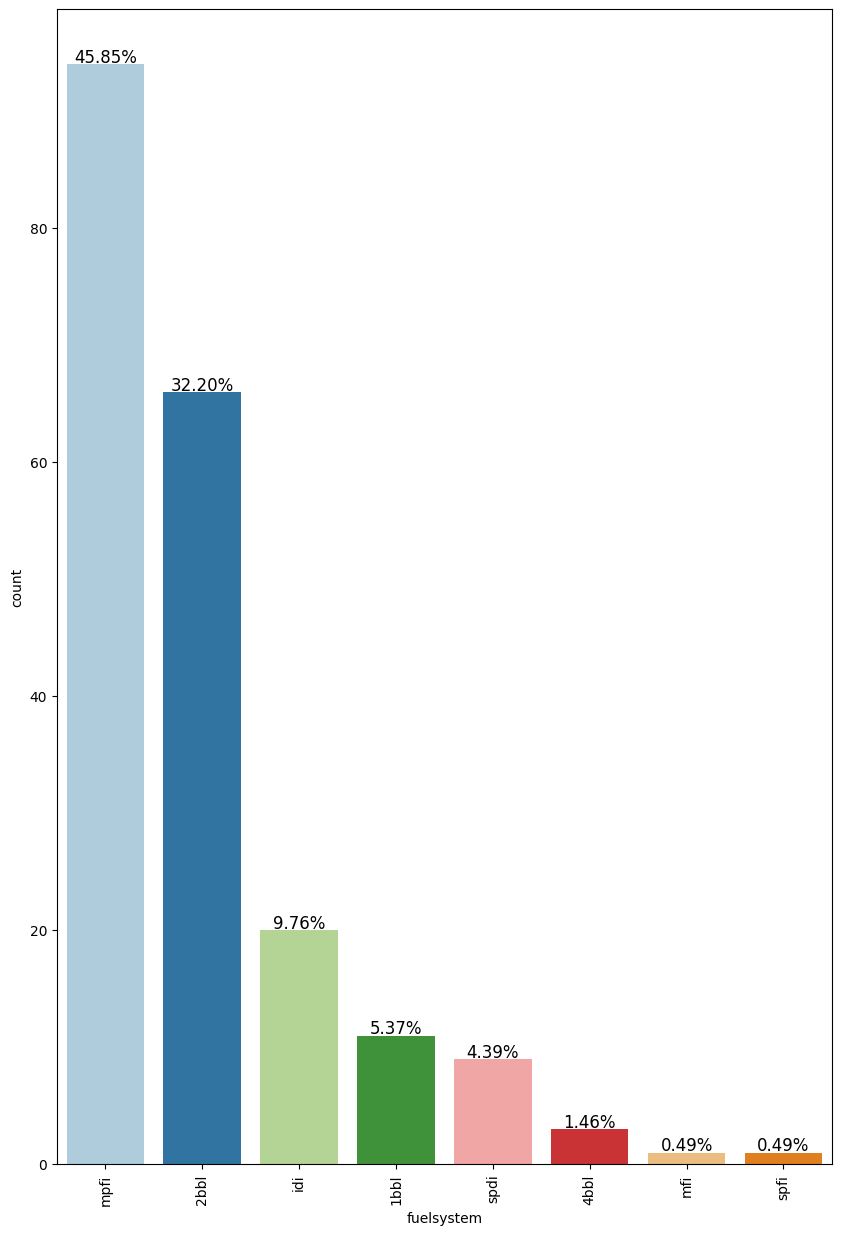

In [13]:

var = car_df.select_dtypes(include='object').columns.to_list()
for i in var:
  countplot_with_percentage(car_df,i,True,n=10)

Data Preprocessing

## Handling Outliers

In [6]:
q1 = car_df['citympg'].quantile(0.25)
q3 = car_df['citympg'].quantile(0.75)

iqr= q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print('q3 - {:.2f},Upper-limit - {:.2f}'.format(q3,upper_limit))
print('q1 - {:.2f},Lower-limit -{:.2f}'.format(q1,lower_limit))

#car_df[(car_df['carwidth']>upper_limit) | (car_df['carwidth']<lower_limit)]['carwidth']
#car_df['carwidth'] = car_df['carwidth'].clip(lower=lower_limit,upper=upper_limit)

#car_df[car_df['carwidth']==upper_limit]['carwidth']

q3 - 30.00,Upper-limit - 46.50
q1 - 19.00,Lower-limit -2.50


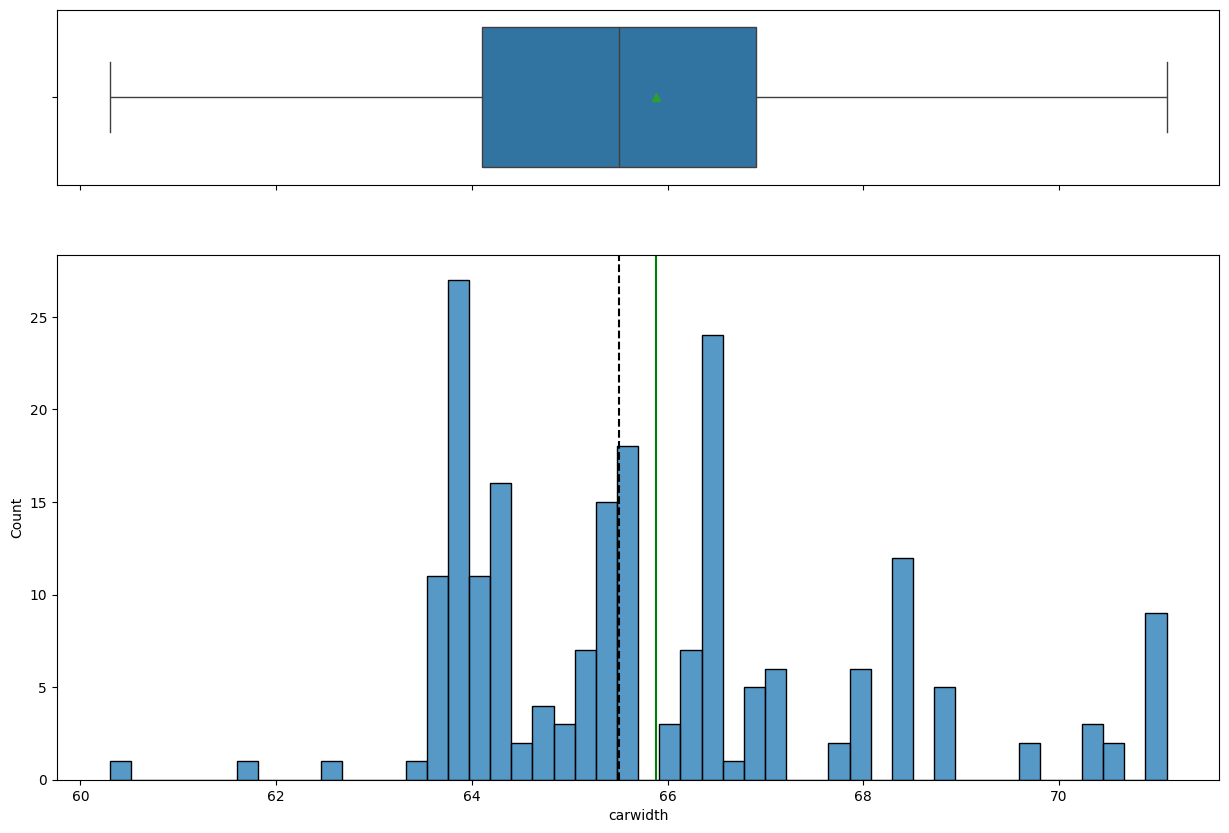

In [22]:
labelled_baplot(car_df,'carwidth')

# Multi Variate Anlaysis

<Axes: >

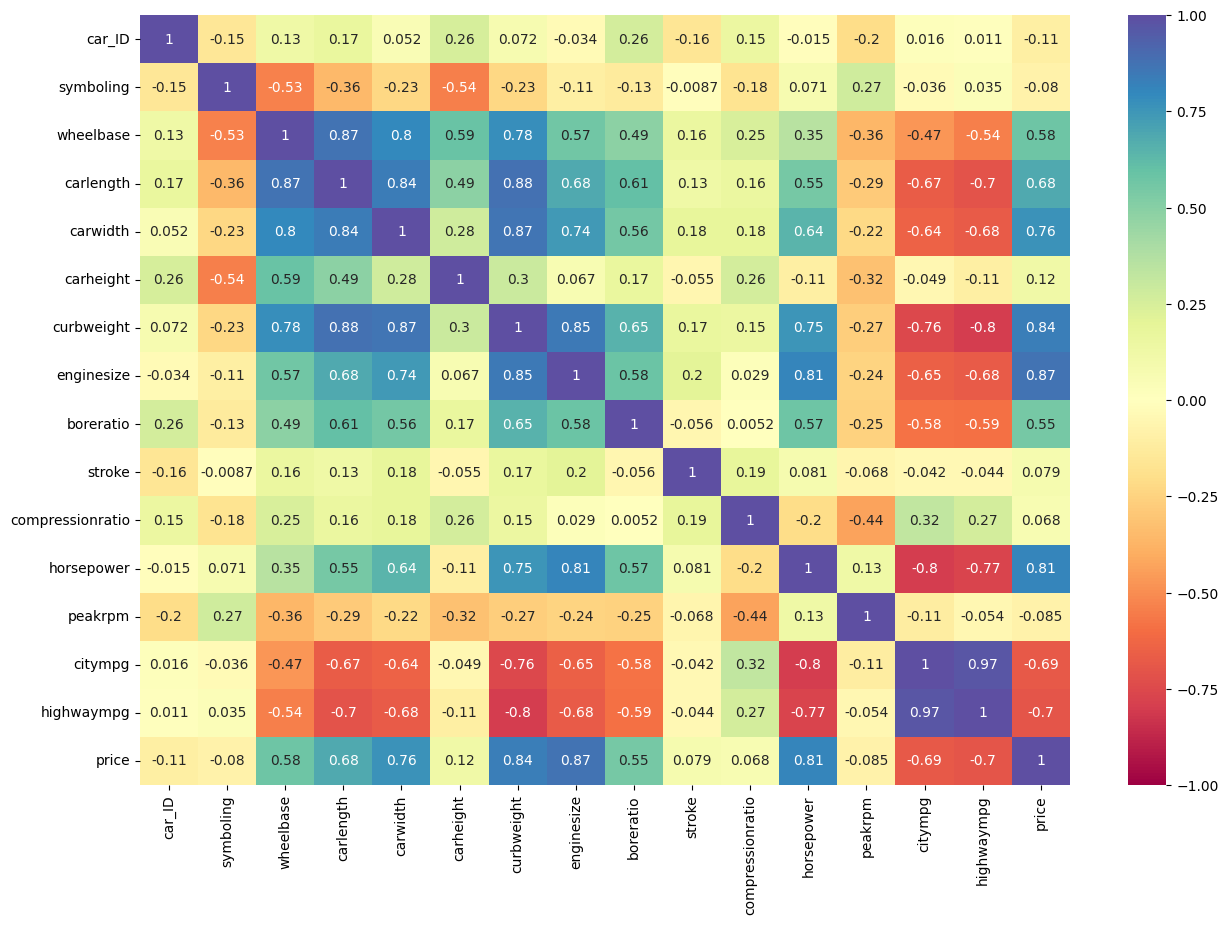

In [7]:
#Plotting a heatmap to observe relationship
#between numerical variables

plt.figure(figsize=(15,10))
sns.heatmap(
            car_df.select_dtypes(include='number').corr(),
            annot=True,
            fmt='.2g',
            cmap='Spectral',
            vmin=-1,
            vmax=1
    )

Price:
-----
Price is postively corelated with Horespower
With increase in horsepower the price increases.
The bigger the car length,car width, curbweight, engine size,
higer the car price.
Price ,City MPG and Highway MPG are negatively corelated.
With increase in City MPG and Highway MPG price decreases.


City MPG/Highway MPG:
-------
City MPG/Highway MPG and Horsepower are negatively corelated.
With increase in Horsepower, City MPG/Highway MPG price decreases.
Car length,car width, curbweight, engine size
are negatively corelated with City MPG/Highway MPG.
With increase in above factors City MPG decreases.

HorsePower:

-----------
Car length,car width, curbweight, engine size
are positively corelated with City MPG.
The bigger the car length,car width, curbweight, engine size,
higer the horse power.



# Data Preprocessing

In [6]:
car_df1=car_df.copy()

In [7]:
Company_df = car_df1['CarName'].apply(lambda x:x.split()[0])
car_df1.insert(1,'Company',Company_df)
car_df1.drop('CarName',axis=1,inplace=True)

In [35]:
car_df1.head()

,car_ID,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
car_df1['Company'].nunique()

23

In [96]:
car_df1['Company'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
car_df1['Company'] = car_df1['Company'].str.lower()

In [9]:
car_df1['Company'] = car_df1['Company'].replace({'vw':'volkswagen','vokswagen':'volkswagen','maxda':'mazda','toyouta':'toyota','alfa-romero':'alfa-romeo','porcshce':'porsche'})

In [10]:
car_df1_dummy = pd.get_dummies(car_df1,columns = car_df1.select_dtypes(include='object').columns,drop_first=True)
car_df1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

# Data Normalization

In [11]:
X = car_df1_dummy.drop('price',axis=1)
y = car_df1_dummy['price']

X = sm.add_constant(X)
print(X.head(5))
print(y.head(5))

   const  car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0    1.0       1          3       88.6      168.8      64.1       48.8   
1    1.0       2          3       88.6      168.8      64.1       48.8   
2    1.0       3          1       94.5      171.2      65.5       52.4   
3    1.0       4          2       99.8      176.6      66.2       54.3   
4    1.0       5          2       99.4      176.6      66.4       54.3   

   curbweight  enginesize  boreratio  ...  cylindernumber_three  \
0        2548         130       3.47  ...                 False   
1        2548         130       3.47  ...                 False   
2        2823         152       2.68  ...                 False   
3        2337         109       3.19  ...                 False   
4        2824         136       3.19  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1                  Fal

In [12]:
var_list = X.select_dtypes(include=bool).columns.to_list()

for var in var_list:
  X[var] = X[var].astype('int64')

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(143, 66) (143,)
(62, 66) (62,)


scale_features = MinMaxScaler()
col = X_train.columns
X_train[col] = scale_features.fit_transform(X_train[col])
# -------------------------------------------------
X_test[col] = scale_features.transform(X_test[col])
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)

# -------------------------------------------------
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [70]:
scale_features = MinMaxScaler()
col = X_train.columns
X_train[col] = scale_features.fit_transform(X_train[col])
# -------------------------------------------------
X_test[col] = scale_features.transform(X_test[col])
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)
y_train = y_train.ravel()
# -------------------------------------------------
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)
y_test = y_test.ravel()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(143, 66) (143,)
(62, 66) (62,)


In [71]:
modelres = sm.OLS(y_train,X_train).fit()
print(modelres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.65
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.17e-49
Time:                        23:07:47   Log-Likelihood:                 292.49
No. Observations:                 143   AIC:                            -467.0
Df Residuals:                      84   BIC:                            -292.2
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.715e-

# Model Evaluation Metrics

In [72]:
def model_evaluation(model,target,predictors):

#Computing mean absolute percentage error
  def mean_absolute_percentage_error(absolute,predicted):
    return np.round(np.mean((np.abs(absolute-predicted)/absolute)*100),2)

#Computing R2 score
  def adjusted_r2_score(r2_score,n,k):
    return np.round(1-((1-r2_score)*(n-1)/(n-k-1)),2)

  predicted = model.predict(predictors)

  mae = mean_absolute_error(target,predicted)
  mape = mean_absolute_percentage_error(target,predicted)
  rmse = np.round(np.sqrt(mean_squared_error(target,predicted)),2)
  r2 = np.round(r2_score(target,predicted),2)
  adj_r2 = adjusted_r2_score(r2,target.shape[0],predictors.shape[1])

  residual_df = pd.DataFrame(
      {
          'Actual':target,
          'Predicted':predicted,
          'Residual':target-predicted
      }
   )

#Computing a dataframe with performance Metrics
  performance_df = pd.DataFrame(
      {
          'MAE':mae,
          'MAPE':mape,
          'RMSE':rmse,
          'R2':r2,
          'Adjusted R2':adj_r2

      },index=[0]
  )
  return performance_df,residual_df





# Evaluating Model performance of Training nd Testing Data

In [73]:
performance_df,residual_df = model_evaluation(modelres,y_train,X_train)
print(performance_df)

        MAE  MAPE  RMSE    R2  Adjusted R2
0  0.023929   inf  0.03  0.98         0.96


In [74]:
#Evaluating model performance on Testing Data

performance_df,residual_df = model_evaluation(modelres,y_test,X_test)
print(performance_df)

        MAE    MAPE  RMSE   R2  Adjusted R2
0  0.039675 -280.81  0.06  0.9         2.22


# Assumptions of Linear Regression

1.Removing multi-colinearity between variables , checking using VIF
2. Removing High P value variables which are insignificant.
3. Checking if the residuals are linear and independent
4. Checking if the distribution of residuals are normal using histogram, shapiro's test, q-q plot(probability plot)
5. Checking if the residuals are homoscedastic

Test for Mulri-Collinearity

In [56]:
def check_vif(x_train):
  vif = pd.DataFrame()
  vif['Features'] = x_train.columns
  vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
  return vif.sort_values(by='VIF',ascending=False)


In [55]:
#Checking Adjusted R2 value after removing high vif column

def removing_multicollinear_column(target,predictors,high_vif_columns,init_adj_r2score):
   """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """

   adj_r2score =[]
   rmse = []
   diff = []

   for i in high_vif_columns:
    #Building the model without high vif columns, dropping one high vif column at a time
    x_train = predictors.loc[:,~predictors.columns.str.startswith(i)]
    model = sm.OLS(target,x_train).fit()

    #appending new r2score
    adj_r2score.append(model.rsquared_adj)
    #rmse.append(np.sqrt(mean_squared_error(target,model.predict(x_train))))
    rmse.append(np.sqrt(model.mse_resid))
    diff.append(np.abs(init_adj_r2score-model.rsquared_adj))

   comp_df = pd.DataFrame(
       {
           'Feature' : high_vif_columns,
           'RMSE':rmse,
           'Adj R2 Score':adj_r2score,
           'init_adj_r2score':init_adj_r2score,
           'Diff':diff

       }
   )
   return comp_df.sort_values(by='Diff')







In [57]:
vif_df = check_vif(X_train)

In [58]:
high_vif_columns = vif_df[vif_df['VIF']>=5]['Features'].to_list()
vif_treatment_df = removing_multicollinear_column(y_train,X_train,high_vif_columns,modelres.rsquared)
vif_treatment_df

,Feature,RMSE,Adj R2 Score,init_adj_r2score,Diff
13,fuelsystem_idi,0.042083,0.978732,0.975495,0.003237
8,fueltype_gas,0.041132,0.979683,0.975495,0.004187
19,Company_porsche,0.040591,0.959062,0.975495,0.016433
29,highwaympg,0.040592,0.959061,0.975495,0.016434
23,horsepower,0.040593,0.959058,0.975495,0.016437
26,Company_buick,0.040596,0.959052,0.975495,0.016443
48,Company_audi,0.040598,0.959050,0.975495,0.016446
51,Company_jaguar,0.040602,0.959040,0.975495,0.016455
16,Company_saab,0.040616,0.959013,0.975495,0.016483
24,citympg,0.040618,0.959008,0.975495,0.016487


In [59]:
vif_treatment_df[vif_treatment_df['Feature'].isin(['highwaympg','citympg'])]

,Feature,RMSE,Adj R2 Score,init_adj_r2score,Diff
29,highwaympg,0.040592,0.959061,0.975495,0.016434
24,citympg,0.040618,0.959008,0.975495,0.016487


## Building models By removing High VIF columns

In [60]:

X_train1 = X_train.loc[:,~X_train.columns.str.startswith('highwaympg')]
y_train1 = y_train
X_test1 = X_test.loc[:,~X_test.columns.str.startswith('highwaympg')]
y_test1 = y_test

olsmodel2 = sm.OLS(y_train1,X_train1).fit()

vif_df1 = check_vif(X_train1)
print(vif_df1.tail(10))
print("\n\n\n")
print(olsmodel2.summary())

                Features       VIF
2              symboling  7.181943
50       enginetype_ohcv  7.076086
10                stroke  6.138092
38        doornumber_two  5.000898
18     Company_chevrolet  4.354873
39       carbody_hardtop  4.142870
64       fuelsystem_spfi  3.035543
0                  const       NaN
55  cylindernumber_three       NaN
61        fuelsystem_mfi       NaN




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     59.36
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.08e-50
Time:                        23:00:24   Log-Likelihood:                 292.48
No. Observations:                 143   AIC:                            -469.0
Df Residuals:                      85   BIC:              

In [61]:
#Building Model by removing High-vif column 'company-porsche'

X_train2 = X_train1.loc[:,~X_train1.columns.str.startswith('Company_porsche')]
y_train2 = y_train1
X_test2 = X_test1.loc[:,~X_test1.columns.str.startswith('Company_porsche')]
y_test2 = y_test1

olsmodel3 = sm.OLS(y_train2,X_train2).fit()

vif_df2 = check_vif(X_train2)
print(vif_df2)
print("\n\n\n")
print(olsmodel3.summary())

                Features       VIF
31        Company_subaru       inf
27       Company_peugeot       inf
58       fuelsystem_4bbl       inf
56    cylindernumber_two       inf
50      enginetype_rotor       inf
..                   ...       ...
24       Company_mercury  2.067217
18     Company_chevrolet  1.966695
0                  const       NaN
54  cylindernumber_three       NaN
60        fuelsystem_mfi       NaN

[64 rows x 2 columns]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     61.13
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.19e-51
Time:                        23:00:39   Log-Likelihood:                 292.48
No. Observations:                 143   AIC:                            -471.0


In [62]:
#Building Model by removing High-vif column 'company-subaru'

X_train3 = X_train2.loc[:,~X_train2.columns.str.startswith('Company_subaru')]
y_train3 = y_train2
X_test3 = X_test2.loc[:,~X_test2.columns.str.startswith('Company_subaru')]
y_test3 = y_test2

olsmodel4 = sm.OLS(y_train3,X_train3).fit()

vif_df3 = check_vif(X_train3)
print(vif_df3)
print("\n\n\n")
print(olsmodel4.summary())

                Features       VIF
27       Company_peugeot       inf
57       fuelsystem_4bbl       inf
55    cylindernumber_two       inf
49      enginetype_rotor       inf
45          enginetype_l       inf
..                   ...       ...
24       Company_mercury  2.067217
18     Company_chevrolet  1.966695
0                  const       NaN
53  cylindernumber_three       NaN
59        fuelsystem_mfi       NaN

[63 rows x 2 columns]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     61.13
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.19e-51
Time:                        23:00:53   Log-Likelihood:                 292.48
No. Observations:                 143   AIC:                            -471.0


In [63]:
#Removing high vif column fuelsystem_4bbl

X_train4 = X_train3.loc[:,~X_train3.columns.str.startswith('fuelsystem_4bbl')]
y_train4 = y_train3
X_test4 = X_test3.loc[:,~X_test3.columns.str.startswith('fuelsystem_4bbl')]
y_test4 = y_test3

olsmodel5 = sm.OLS(y_train4,X_train4).fit()

vif_df4 = check_vif(X_train4)
print(vif_df4)
print("\n\n\n")
print(olsmodel5.summary())


                Features         VIF
27       Company_peugeot         inf
45          enginetype_l         inf
49      enginetype_rotor         inf
55    cylindernumber_two         inf
34          fueltype_gas  930.781182
..                   ...         ...
24       Company_mercury    2.067217
18     Company_chevrolet    1.966695
0                  const         NaN
53  cylindernumber_three         NaN
58        fuelsystem_mfi         NaN

[62 rows x 2 columns]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     61.13
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.19e-51
Time:                        23:01:03   Log-Likelihood:                 292.48
No. Observations:                 143   AIC:           

## Removing High P variable

We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [64]:

col = X_train4.columns.tolist()
predictors = X_train4.copy()

while(len(col)>1):

 X_train_aux = predictors[col]

 model = sm.OLS(y_train4,X_train_aux).fit()

 max_p_value = model.pvalues.max()
 max_p_feature = model.pvalues.idxmax()

 if(max_p_value > 0.05):
  col.remove(max_p_feature)
 else:
  break;

selected_cols = col
print('List of retained features are = ', selected_cols)

List of retained features are =  ['car_ID', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'compressionratio', 'peakrpm', 'Company_bmw', 'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu', 'Company_mazda', 'Company_mercury', 'Company_mitsubishi', 'Company_nissan', 'Company_peugeot', 'Company_plymouth', 'Company_renault', 'Company_saab', 'Company_toyota', 'Company_volkswagen', 'Company_volvo', 'fueltype_gas', 'carbody_hatchback', 'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_idi']


In [77]:
#Building a model after removing high P values


X_train5 = X_train4[selected_cols]
y_train5 = y_train4.ravel()
X_test5 = X_test4[selected_cols]
y_test5 = y_test4.ravel()

olsmodel5 = sm.OLS(y_train5,X_train5).fit()
print(olsmodel5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.87e-67
Time:                        23:09:25   Log-Likelihood:                 270.87
No. Observations:                 143   AIC:                            -475.7
Df Residuals:                     110   BIC:                            -378.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
car_ID                  0.2213    

In [78]:
#testing model performance on Training data

performance_df_5,residual_df_5 = model_evaluation(olsmodel5,y_train5,X_train5)

In [79]:
residual_df_5

,Actual,Predicted,Residual
124,0.188260,0.227580,-0.039320
181,0.262530,0.262582,-0.000053
154,0.067230,0.032172,0.035058
53,0.037309,0.042773,-0.005464
94,0.052332,0.025722,0.026609
...,...,...,...
133,0.173486,0.216961,-0.043475
137,0.333914,0.254625,0.079289
72,0.742719,0.739599,0.003120
140,0.059893,0.051966,0.007927


# Test for Linearity and independence of variables

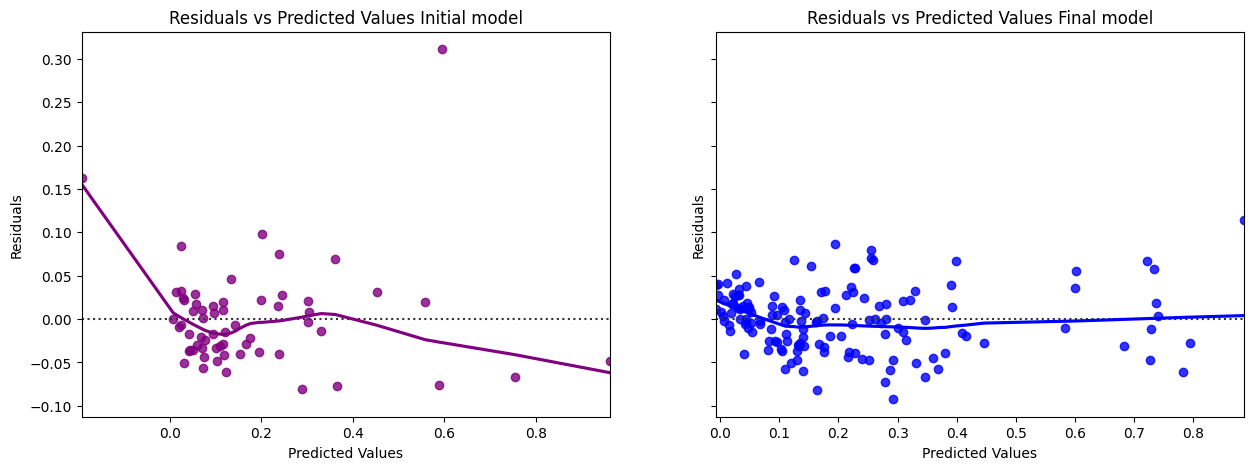

In [80]:

f,(ax1,ax2)= plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.residplot(data=residual_df ,x='Predicted',y='Residual',color='Purple',lowess=True,ax=ax1)
ax1.set_title('Residuals vs Predicted Values Initial model')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
sns.residplot(data=residual_df_5 ,x='Predicted',y='Residual',color='Blue',lowess=True,ax=ax2)
ax2.set_title('Residuals vs Predicted Values Final model')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
plt.show()

The residual plot shows pattern.There is non-linearity. we gotta remove them.

# Normality of Residuals

<Axes: xlabel='Residual', ylabel='Count'>

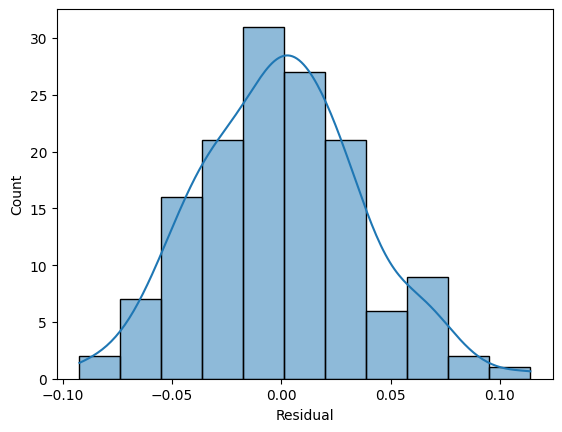

In [81]:
sns.histplot(residual_df_5['Residual'],kde=True)

In [82]:
from scipy.stats import shapiro
test_stat,p_value = shapiro(residual_df_5['Residual'])

print(test_stat,p_value)

0.9946634582022965 0.8790193853195558


In [83]:
if(p_value<0.05):
  print('Residuals are not normally distributed')
else:
  print('Residuals are  normally distributed')

Residuals are  normally distributed


From Shapiro wilks test of testing normality we infer that residuals follow normal distribution

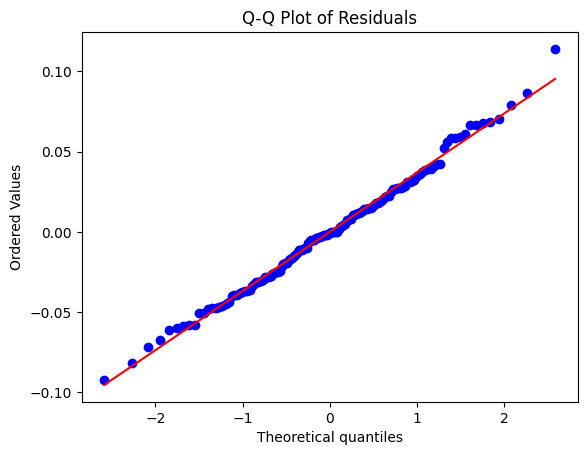

In [84]:
import pylab
import scipy.stats as stats

stats.probplot(residual_df_5['Residual'],plot=pylab)
plt.title('Q-Q Plot of Residuals')
plt.show()


# Test for Homoscedacity

Hypothesis Testing
----------------
Step 1: Variance of The residual values is equal along the regression line.Check for Homoscedasticity.
Null : The residuals are homoscedastic
Alternate: The residuals are not homoscedastic

Step 2: Performing goldfeldquandtest

Step 3: Alpha = 0.05

Step 4: Identify Data (residual_df & X_train)

Step 5: Perform Test

Step 6: Draw conclusion

In [85]:
from statsmodels.stats.api import het_goldfeldquandt

test = het_goldfeldquandt(residual_df_5['Residual'],X_train)

print('Stat - {0:.2f}'.format(test[0]),'Pvalue - {0:.2f}'.format(test[1]))


Stat - 1.38 Pvalue - 0.26


In [86]:
if(test[1]<0.05):
  print('Residuals are not homoscedastic')
else:
  print('Residuals are homoscedastic')

Residuals are homoscedastic


# Building The final Model

In [87]:
X_train_final = X_train5.copy()
y_train_final = y_train5.copy()
X_test_final = X_test5.copy()
y_test_final = y_test5.copy()

olsmodel_final = sm.OLS(y_train_final,X_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.87e-67
Time:                        23:10:53   Log-Likelihood:                 270.87
No. Observations:                 143   AIC:                            -475.7
Df Residuals:                     110   BIC:                            -378.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
car_ID                  0.2213    

In [88]:
#Checking the model performance on training Data

performance_df_final,residual_df_final = model_evaluation(olsmodel_final,y_train_final,X_train_final)
print(performance_df_final)

        MAE  MAPE  RMSE    R2  Adjusted R2
0  0.028705   inf  0.04  0.97         0.96


In [89]:
#Checking the model performance on testing Data

performance_df_final,residual_df_final = model_evaluation(olsmodel_final,y_test_final,X_test_final)
print(performance_df_final)

        MAE    MAPE  RMSE    R2  Adjusted R2
0  0.043613 -353.79  0.07  0.89         0.74


# Final Model Equation

In [90]:
features = X_train_final.columns.to_list()
coef = olsmodel_final.params.to_list()

print('Used Car Price = ',end =' ')
for i in range(len(coef)):
  if (i==0):
    print(coef[i],end =' ')
  else:
    print(' +('+str(coef[i])+' * '+features[i] + ')',end=' ')



Used Car Price =  0.22133788560491818  +(0.15778616723622452 * wheelbase)  +(-0.24071568472558158 * carlength)  +(0.23712803935642152 * carwidth)  +(0.23132759691364202 * curbweight)  +(0.49003843907023514 * enginesize)  +(-0.13867469666445315 * boreratio)  +(-0.5364134577518525 * compressionratio)  +(0.08135626276620883 * peakrpm)  +(0.11760500829637094 * Company_bmw)  +(-0.14090054920555442 * Company_chevrolet)  +(-0.1630486523291011 * Company_dodge)  +(-0.16644404518306508 * Company_honda)  +(-0.126282728374093 * Company_isuzu)  +(-0.15344963624290073 * Company_mazda)  +(-0.15038936894215435 * Company_mercury)  +(-0.25750303580484063 * Company_mitsubishi)  +(-0.2134329978715187 * Company_nissan)  +(-0.13761817416952793 * Company_peugeot)  +(-0.2776139732069077 * Company_plymouth)  +(-0.2669148188380631 * Company_renault)  +(-0.1477882048047423 * Company_saab)  +(-0.2899440023352598 * Company_toyota)  +(-0.30312762470801663 * Company_volkswagen)  +(-0.26126893248065275 * Company_volv

Actionable Insights and Reccomendations

